In [16]:
!pip install umap-learn
!pip install pacmap

In [59]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from scipy import stats
import umap
import pacmap


from itertools import combinations
import warnings

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


[1] Сгенерировать двумерные датасеты df_a (размерности 4х4, 16х16, 256х256), в
которых в каждой строке х начиная с колонки y(=х) значения следующих (a/2)
ячеек равны «1» (если достигнут конец строки датасета, сверх размера
датасета не заполняем, на новую строку не переходим), а оставшиеся ячейки
датасета равны «0». Выполнить визуализацию датасетов в пространстве X-Y.

In [18]:
def generate_dataset(a):
    out = np.zeros(shape=(a,a))
    for row in range(a):
        for i in range(a//2):
            if row + i == a:
                break
            else:
                out[row][row+i] = 1
    return out

In [19]:
datasets = {}
sizes = [4, 16, 256]
for size in sizes:
    datasets[size] = generate_dataset(size)


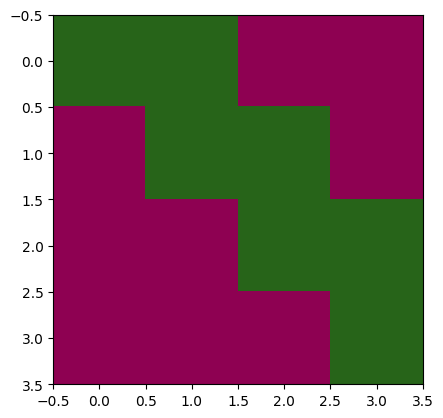

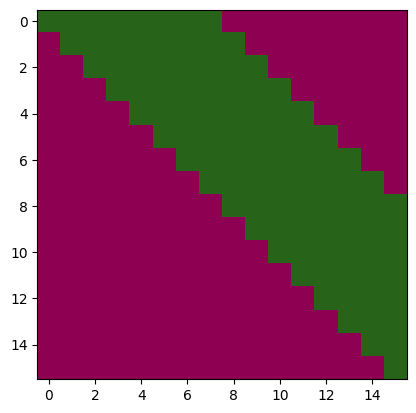

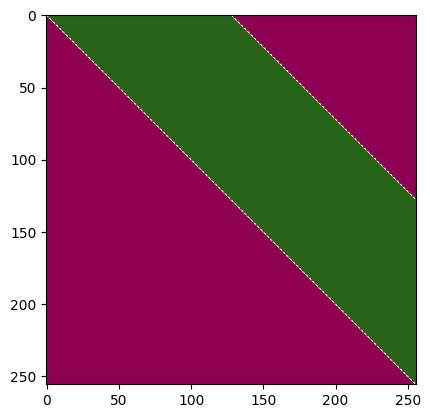

In [20]:
for size in sizes:
    plt.imshow(datasets[size], cmap='PiYG')
    plt.show()

[2] Используя метод главных компонент (основанный на корреляциях), для
каждого датасета df_a отдельно визуализировать:
- Scree plot;
- Отображения отдельных объектов-строк в двумерных пространствах первых

компонент от 1 до а (а на выбор от 4 до 8) – без отображения старых векторов-
переменных;

- Отображения отдельных объектов-строк в двумерных пространствах первых

компонент от 1 до а (а на выбор от 4 до 8) – с отображением старых векторов-
переменных.

- Отображения отдельных объектов-строк в двумерных пространствах первых
компонент от c до c+а (а на выбор от 4 до 8, c – любая со 129) – без отображения
старых векторов-переменных;
- Отображения отдельных объектов-строк в двумерных пространствах первых
компонент от c до c+а (а на выбор от 4 до 8, c – любая со 129)– с отображением
старых векторов-переменных.

In [21]:
def show_scree_plot(df):

  pca = PCA()
  pca.fit(df)
  plt.bar(range(1, len(df[0]) + 1), pca.explained_variance_ratio_)
  plt.title("Scree plot")

  plt.tight_layout()
  plt.show()

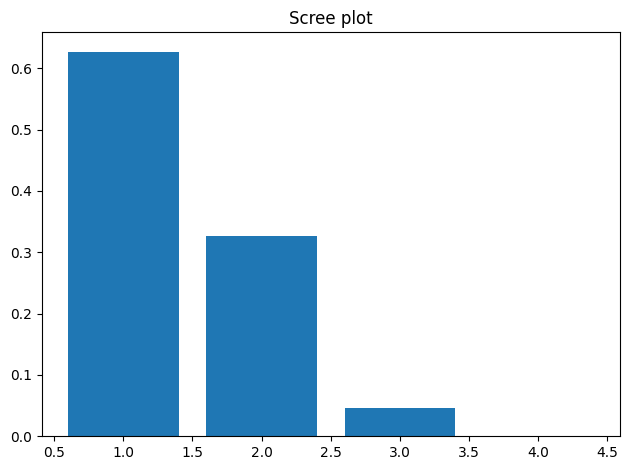

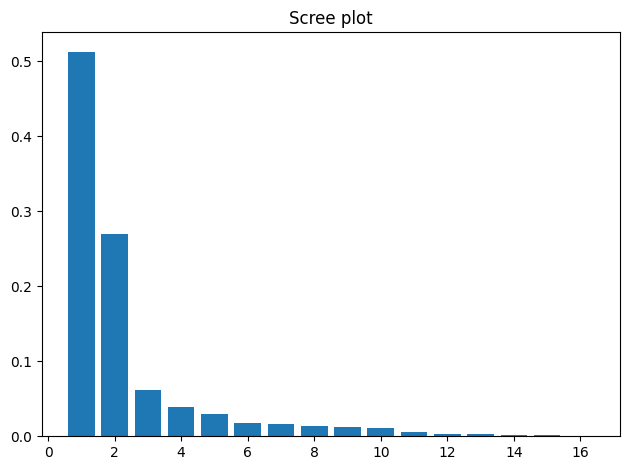

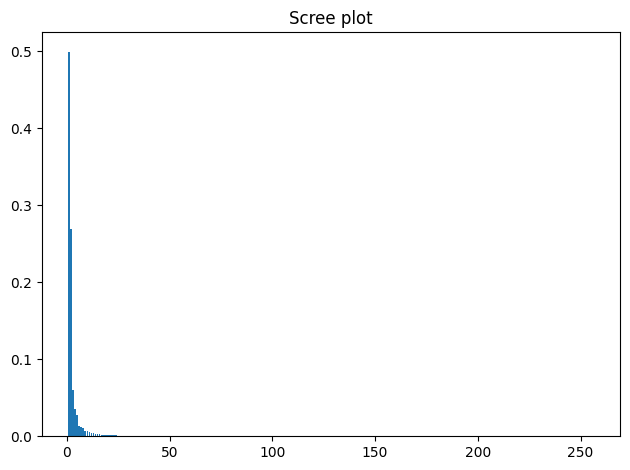

In [22]:
for size in sizes:
  show_scree_plot(datasets[size])

In [23]:
def plot_pca_components(df_fit, pca, num_components, with_arrows=False):
    subplot_idx = 1
    for i in range(num_components):
        for j in range(i + 1, num_components):
            plt.subplot(num_components - 1, num_components - 1, subplot_idx)
            plt.scatter(df_fit[:, i], df_fit[:, j])
            plt.xlabel(f"Component {i + 1}")
            plt.ylabel(f"Component {j + 1}")

            if with_arrows:
                for k in range(df_fit.shape[1]):
                    plt.arrow(0, 0, pca.components_[i, k], pca.components_[j, k], color='red', alpha=0.5)

            subplot_idx += 1

In [24]:
def show_pca(dataset):
    pca = PCA()
    df_fit = pca.fit_transform(dataset)

    plt.figure(figsize=(12, 12))
    num_components = 4

    plot_pca_components(df_fit, pca, num_components, with_arrows=False)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 12))
    plot_pca_components(df_fit, pca, num_components, with_arrows=True)
    plt.tight_layout()
    plt.show()

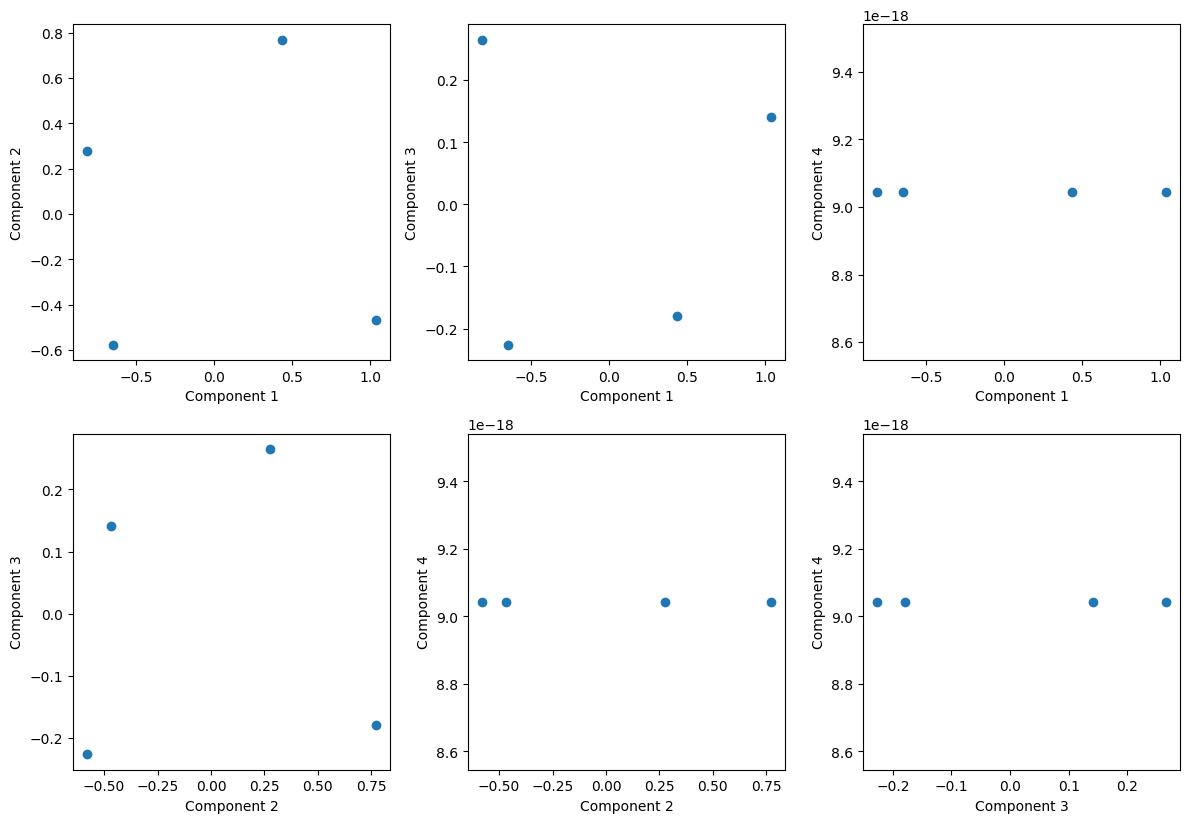

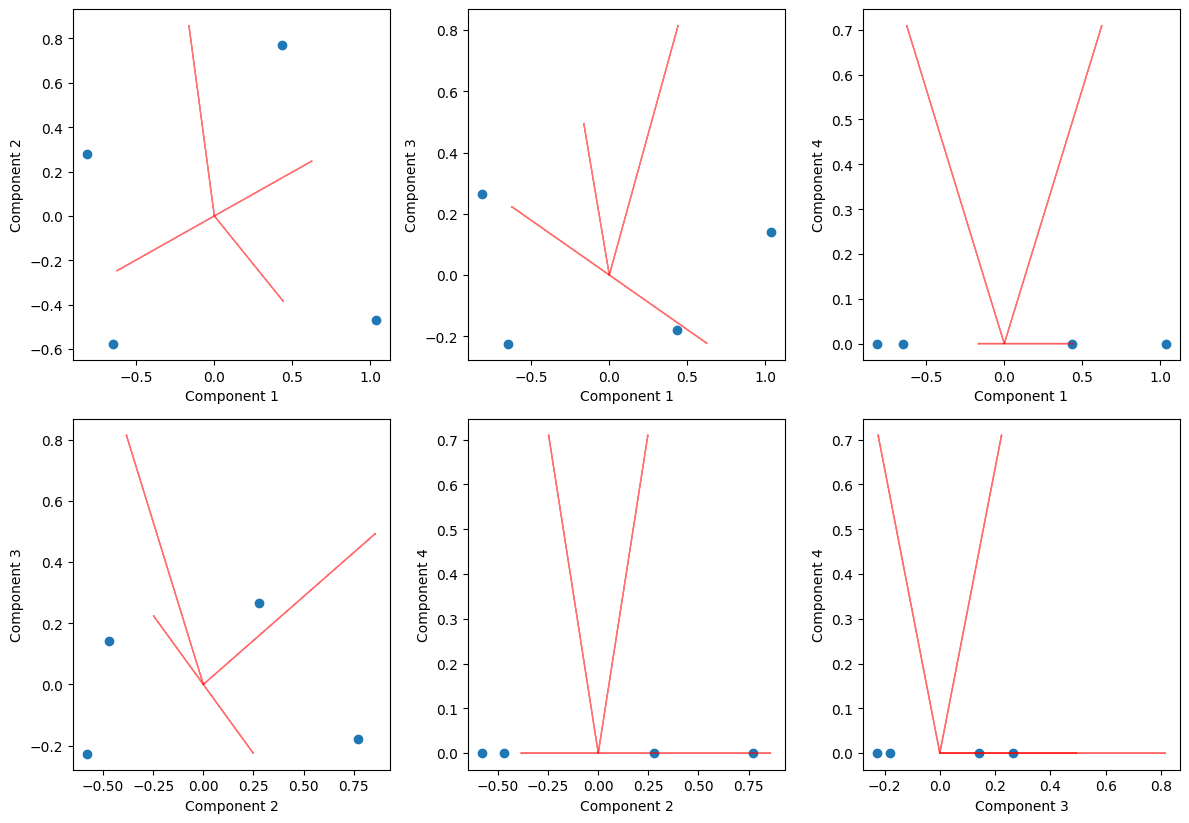

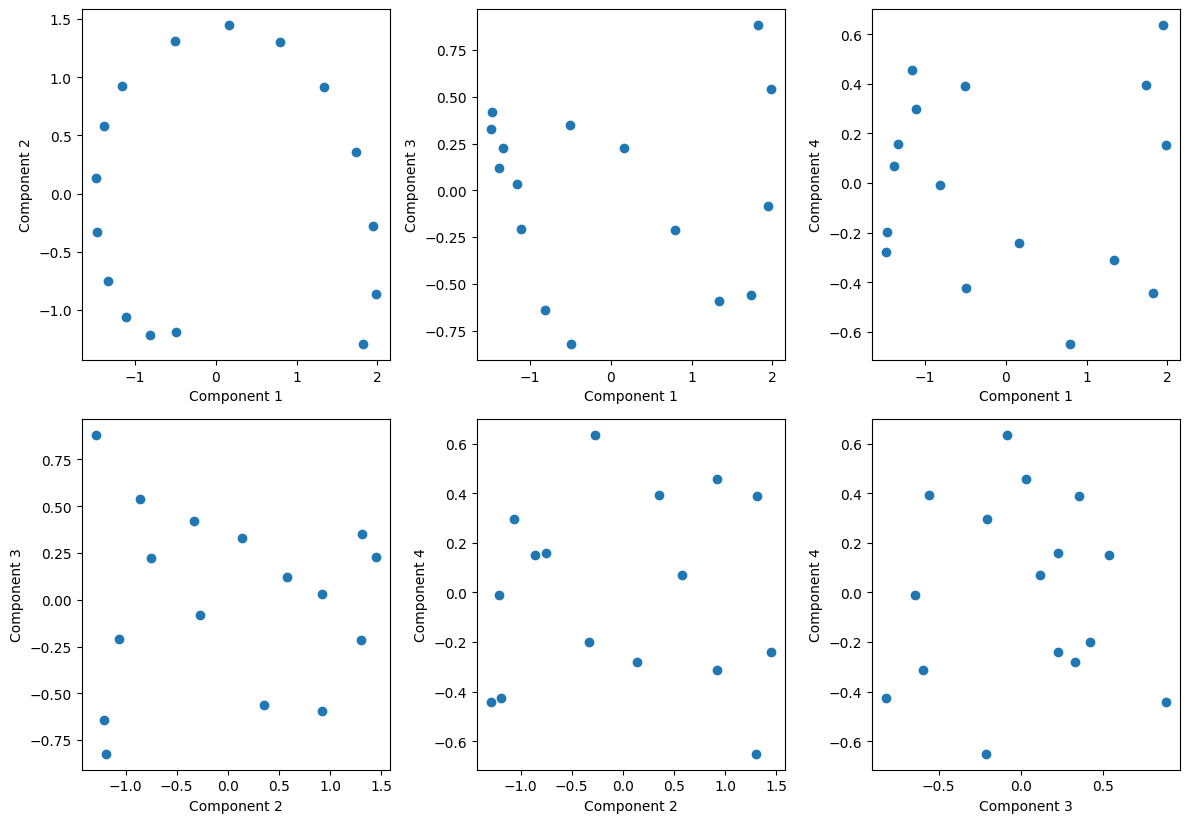

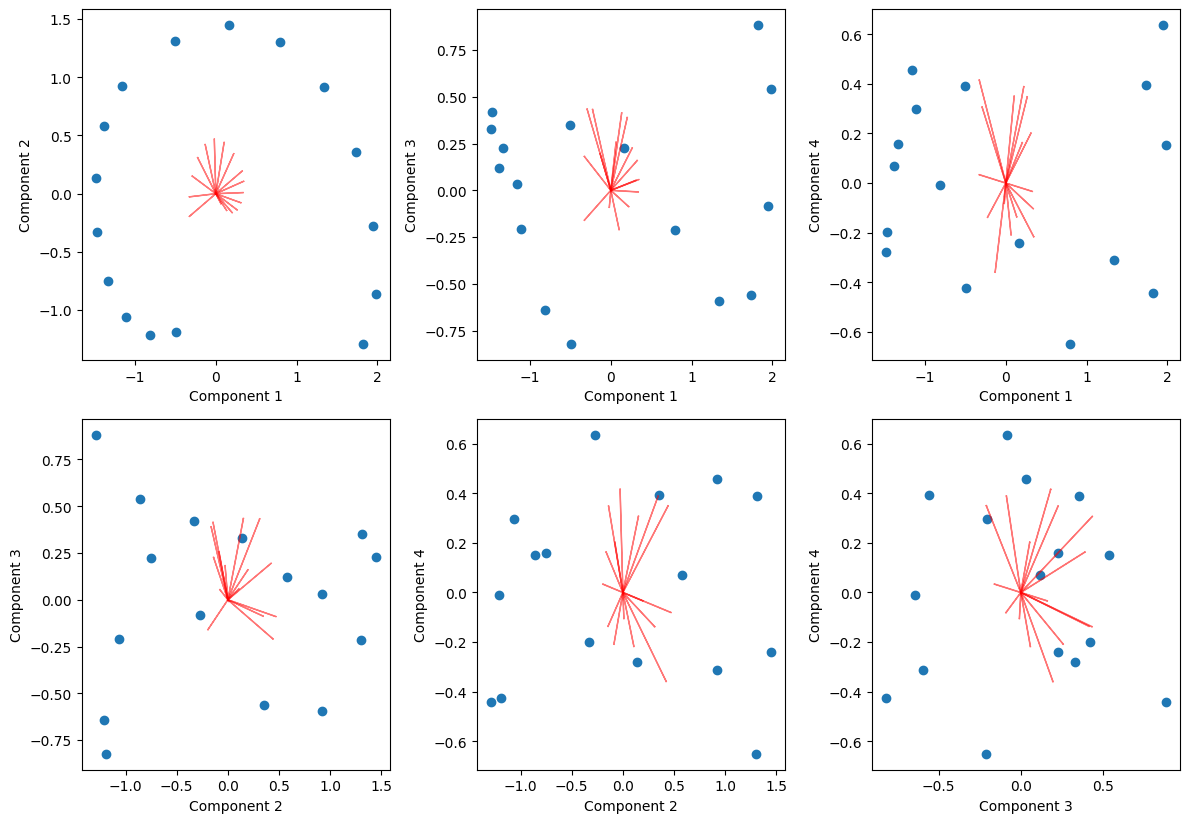

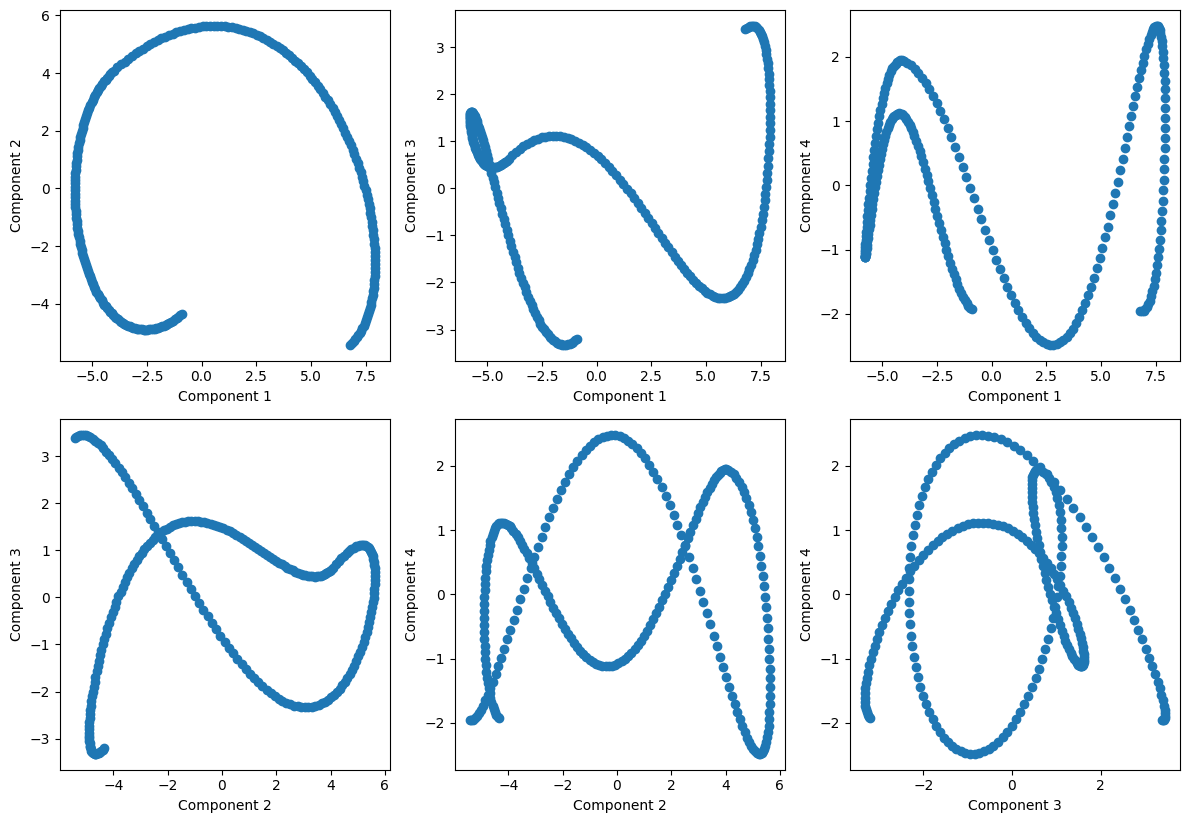

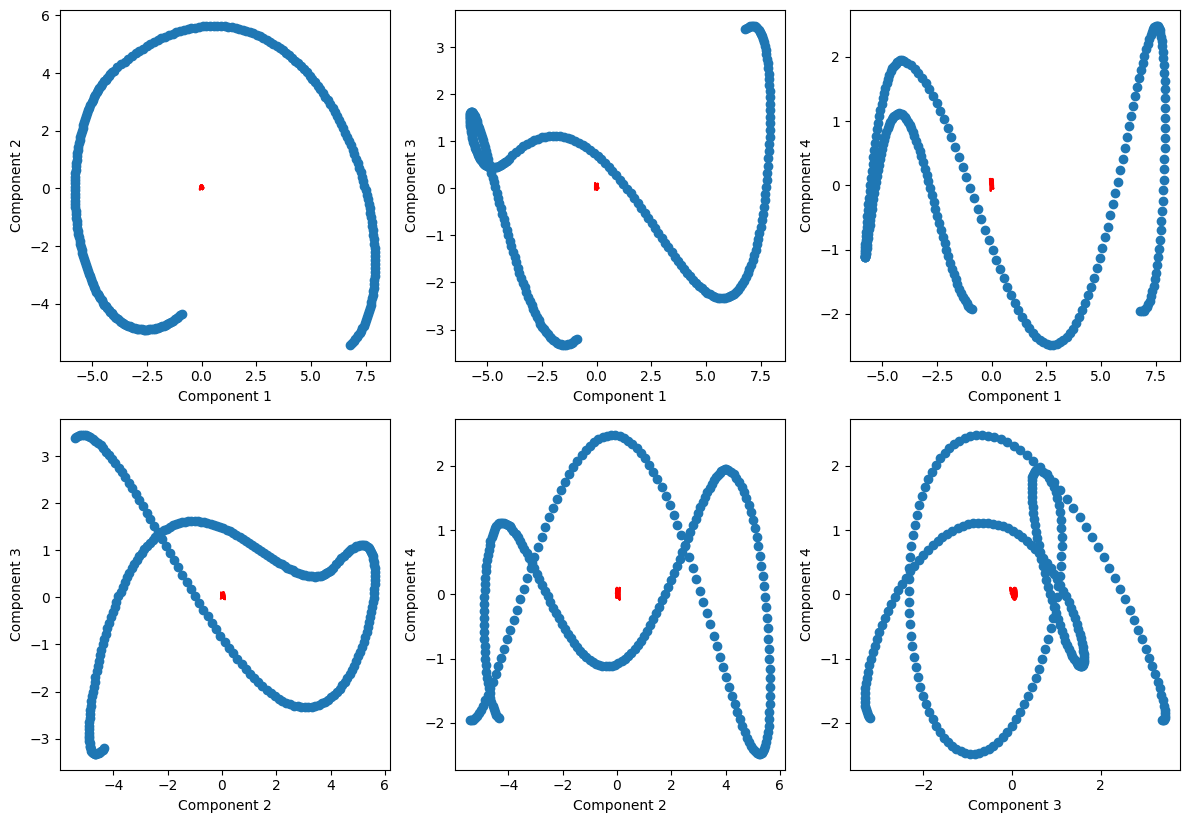

In [25]:
for size in sizes:
    show_pca(datasets[size])

In [26]:
def show_low_components(df):
    pca = PCA()
    df_fit = pca.fit_transform(df)
    plt.figure(figsize=(12, 12))
    c = 128
    num_components = 4
    subplot_idx = 1

    for i in range(c + 1, c + num_components):
        plt.subplot(num_components - 1, num_components - 1, subplot_idx)
        plt.scatter(df_fit[:, c], df_fit[:, i])
        plt.xlabel(f'component {c + 1}')
        plt.ylabel(f'component {i + 1}')

        subplot_idx += 1

        for j in range(len(df)):
            plt.arrow(0, 0, pca.components_[c, j], pca.components_[i, j], color='red', alpha=0.2)
    plt.tight_layout()
    plt.show()

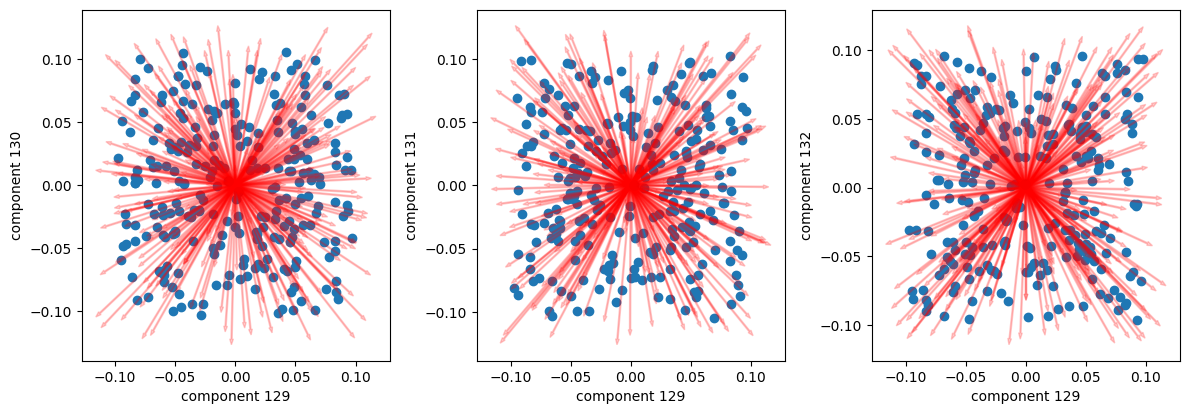

In [27]:
show_low_components(datasets[256])

[3] Используя методы UMAP, PacMAP и tSNE, для каждого датасета df_a
отдельно визуализировать проекции c нескольких рендом-стартов, а также после
предвращения датасета методом PCA

In [28]:
random_states = [42, 54, 71]

In [29]:
def show_methods(df, random_states):
    plt.figure(figsize=(12, 4))
    for i in range(len(random_states)):
        reducer = umap.UMAP(n_components=2, random_state=random_states[i])
        embedding = reducer.fit_transform(df)
        plt.subplot(1, len(random_states), i + 1)
        plt.scatter(embedding[:, 0], embedding[:, 1])
    plt.show()

    plt.figure(figsize=(12, 4))
    if (size != 4):
      for i in range(len(random_states)):
          reducer = pacmap.PaCMAP(MN_ratio=1, FP_ratio=0.1, random_state=random_states[i])
          embedding = reducer.fit_transform(df)
          plt.subplot(1,len(random_states),i+1)
          plt.scatter(embedding[:, 0], embedding[:, 1])
      plt.show()

    plt.figure(figsize=(12, 4))
    for i in range(len(random_states)):
        reducer = TSNE(perplexity=3, random_state=random_states[i])
        embedding = reducer.fit_transform(df)
        plt.subplot(1,len(random_states),i+1)
        plt.scatter(embedding[:, 0], embedding[:, 1])
    plt.show()

UMAP for 4


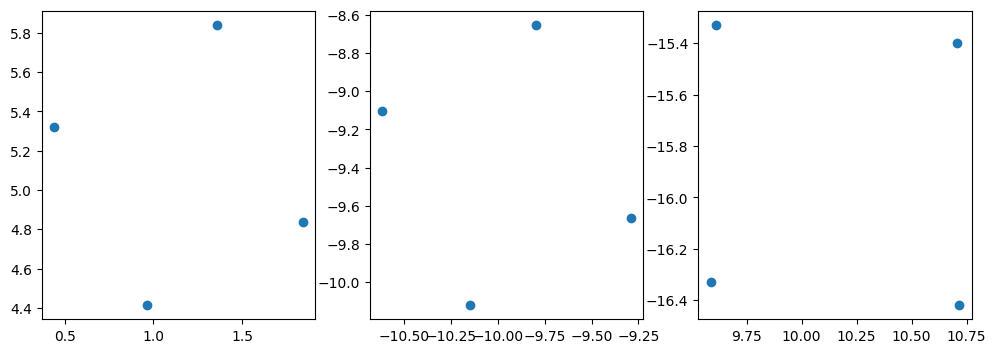

<Figure size 1200x400 with 0 Axes>

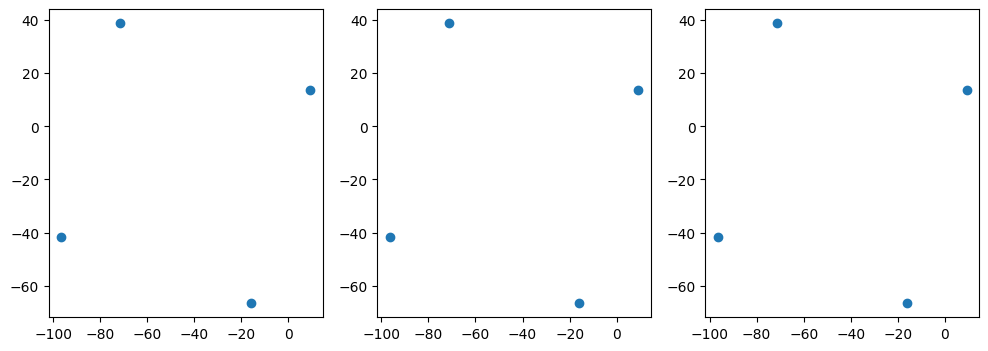

UMAP for 16


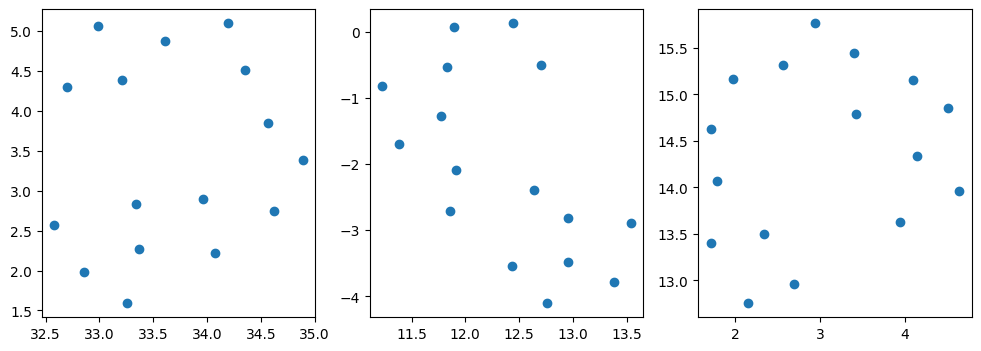

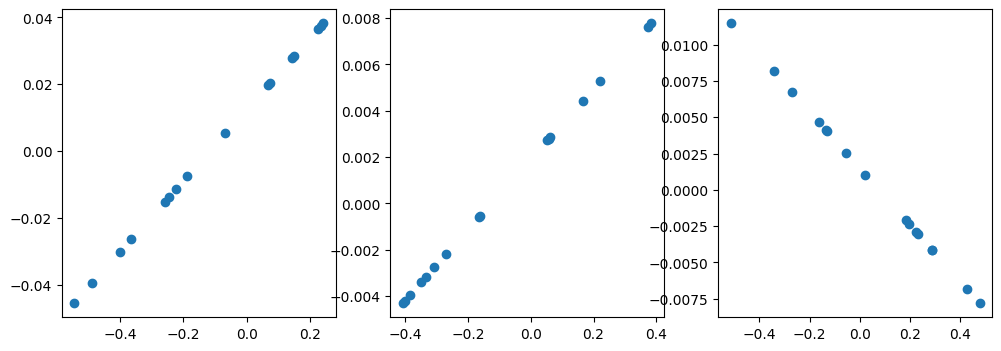

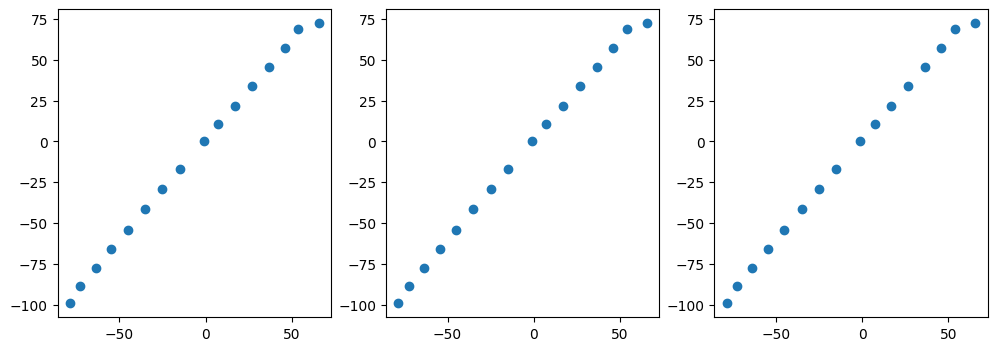

UMAP for 256


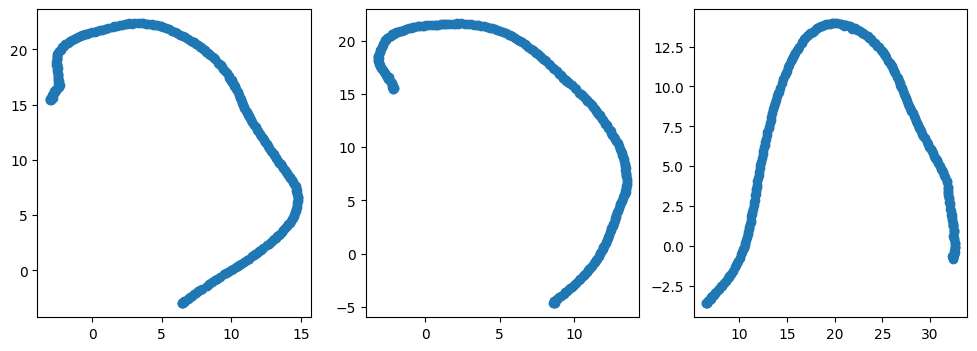

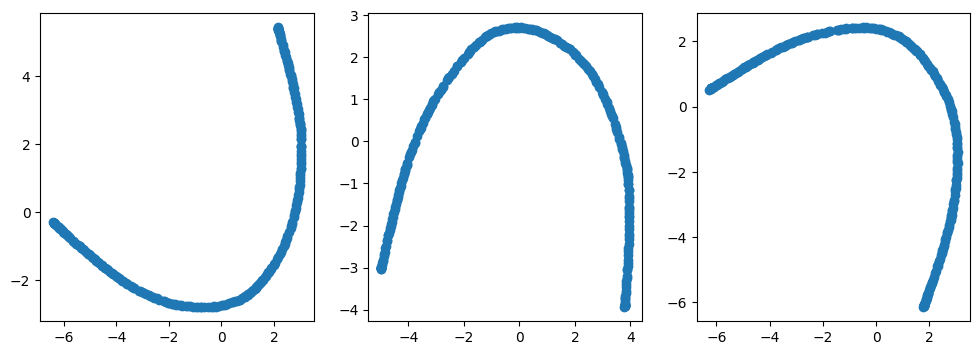

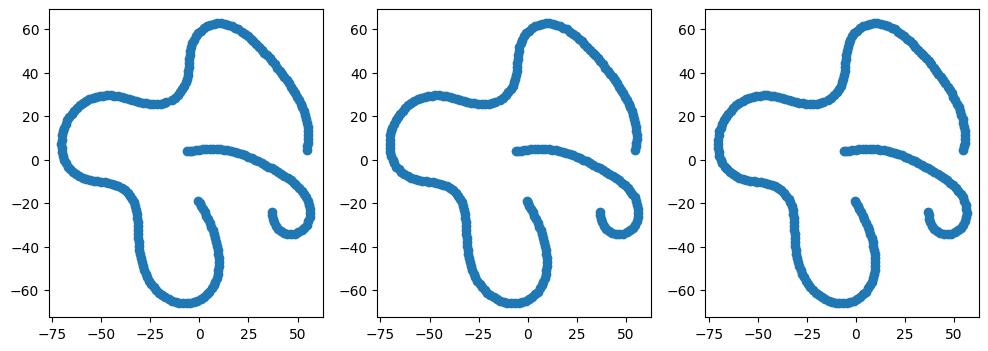

PaCMAP for 16


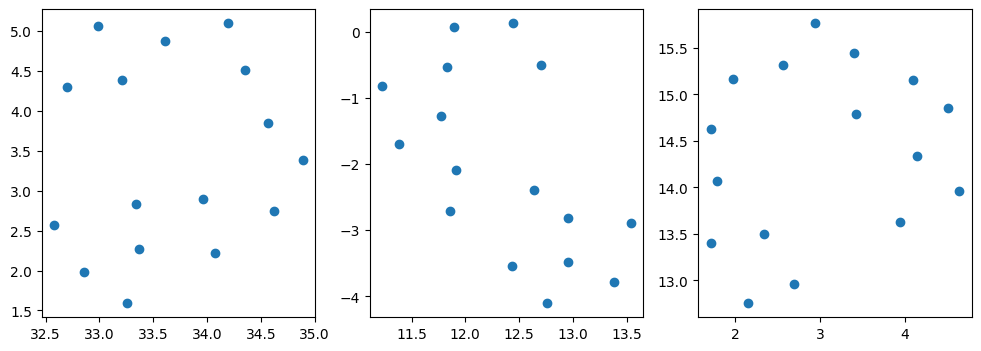

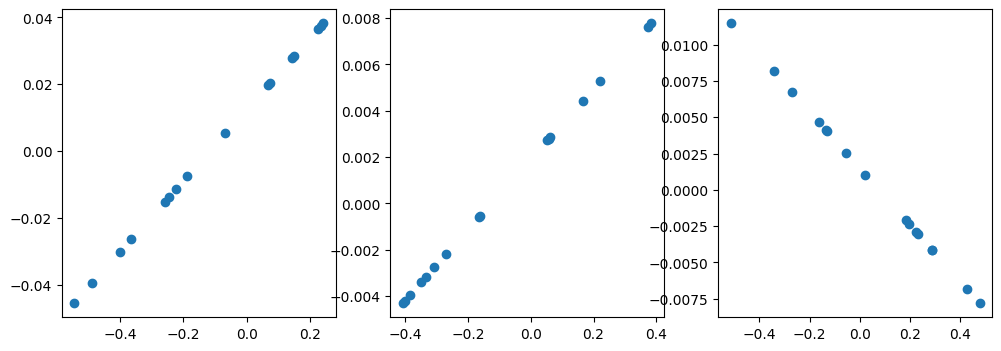

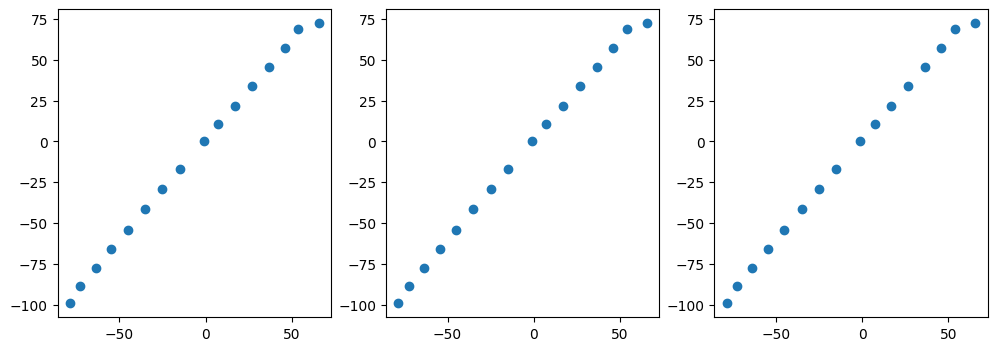

PaCMAP for 256


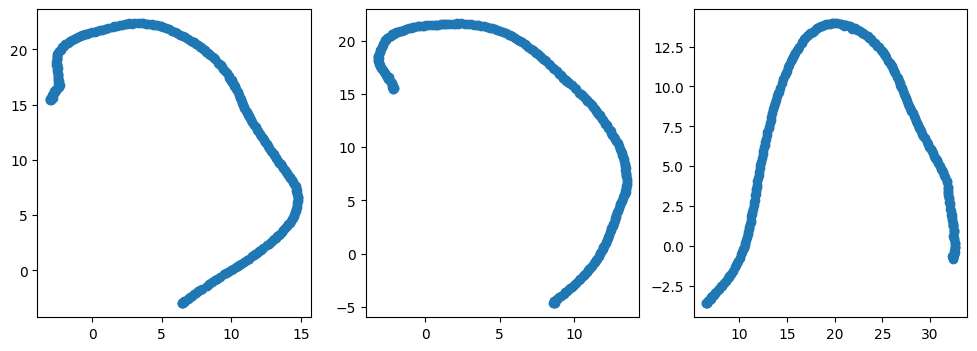

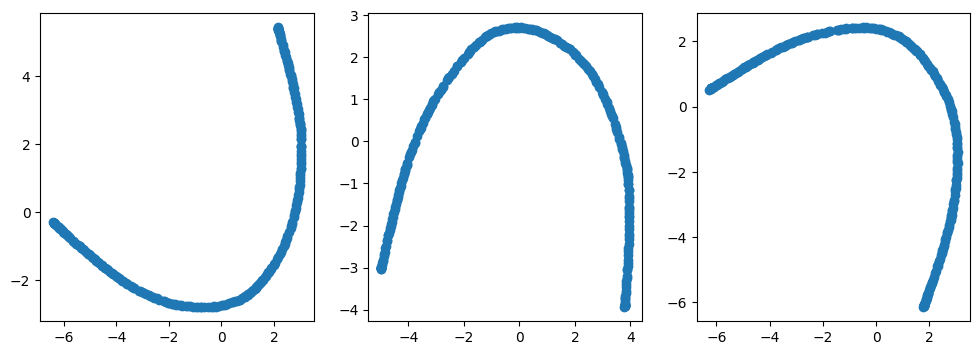

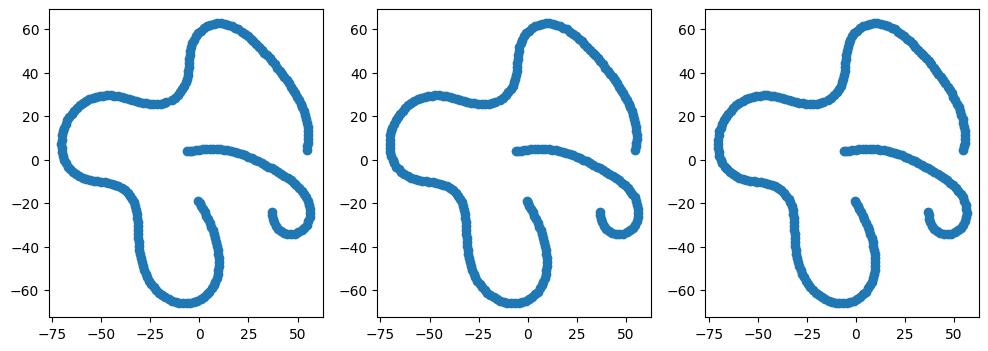

TSNE for 4


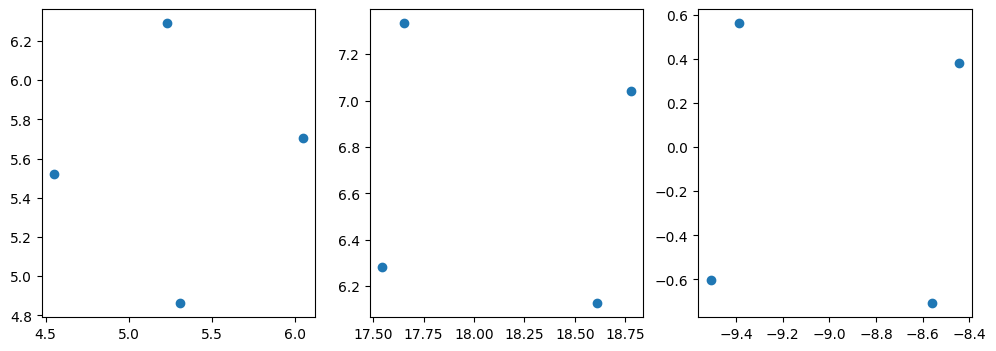

<Figure size 1200x400 with 0 Axes>

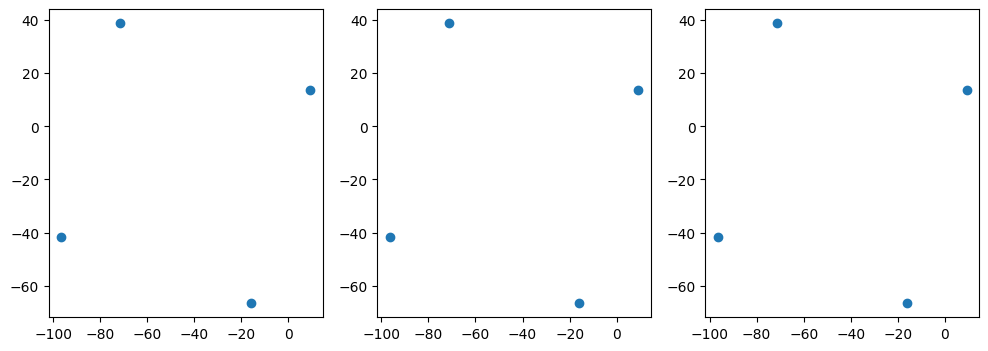

TSNE for 16


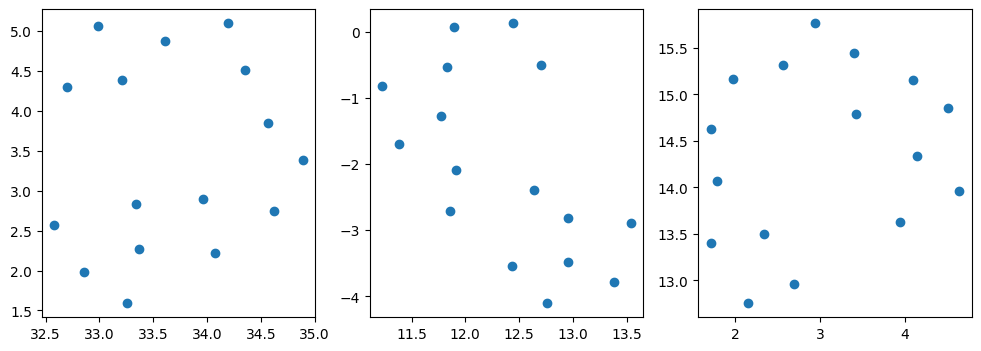

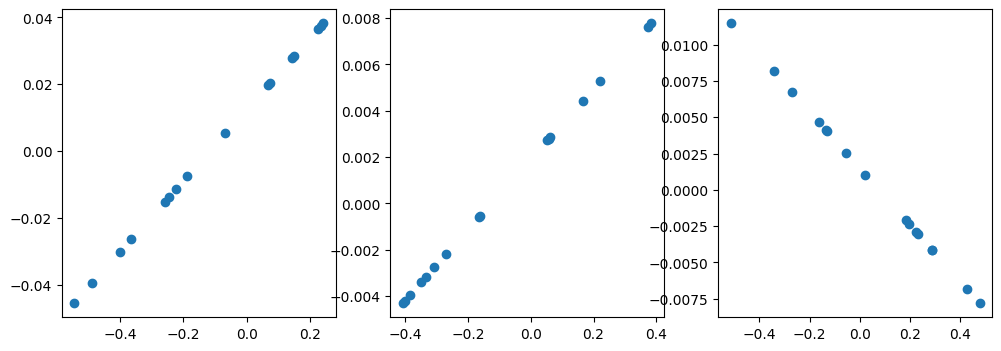

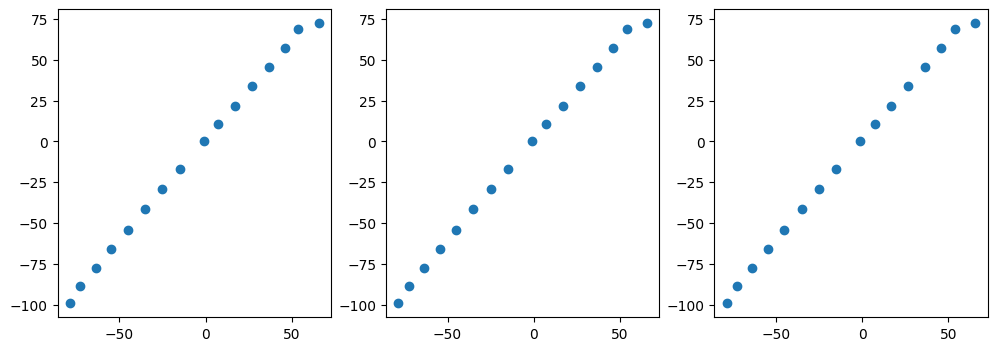

TSNE for 256


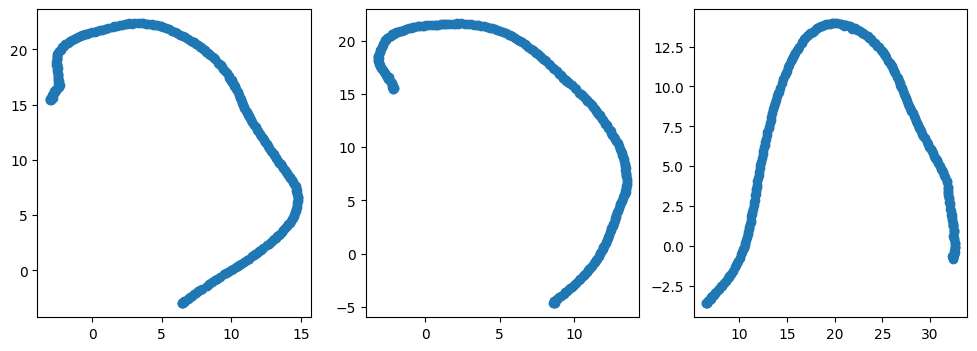

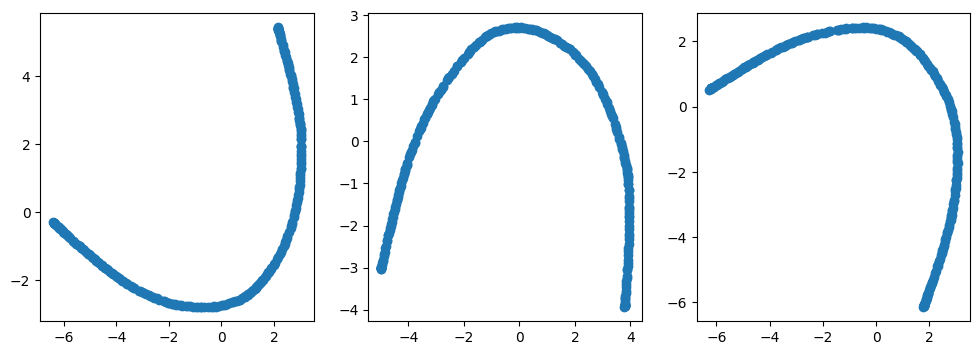

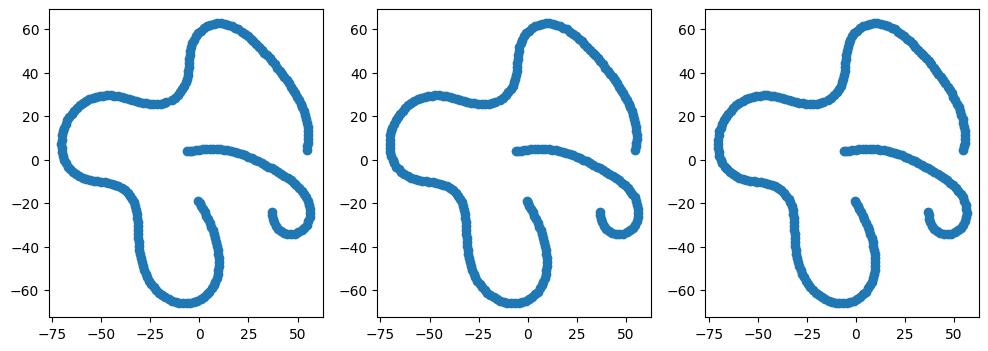

In [30]:
warnings.filterwarnings('ignore')
methods = ['UMAP', 'PaCMAP', 'TSNE']
for method in methods:
  for size in sizes:
    if (size == 4 and method == 'PaCMAP'):
      continue
    print(f'{method} for {size}')
    show_methods(datasets[size], random_states)
warnings.filterwarnings("default")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PCA + UMAP for 4


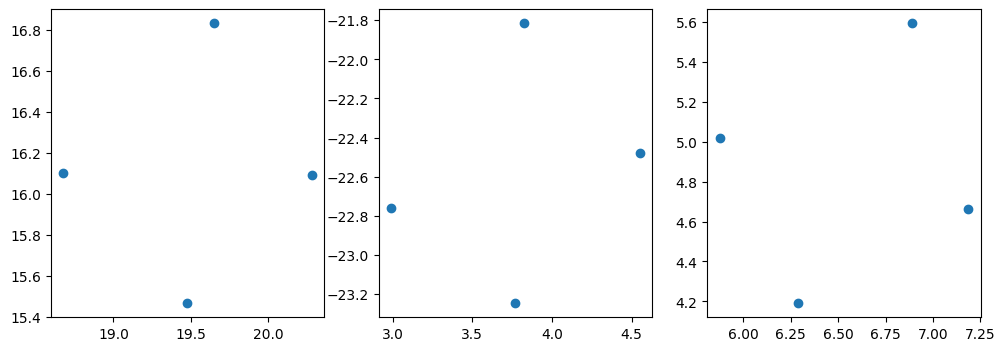

<Figure size 1200x400 with 0 Axes>

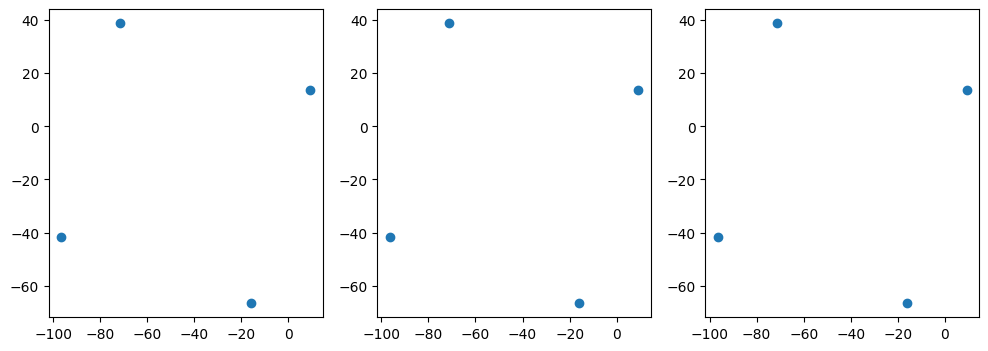

PCA + UMAP for 16


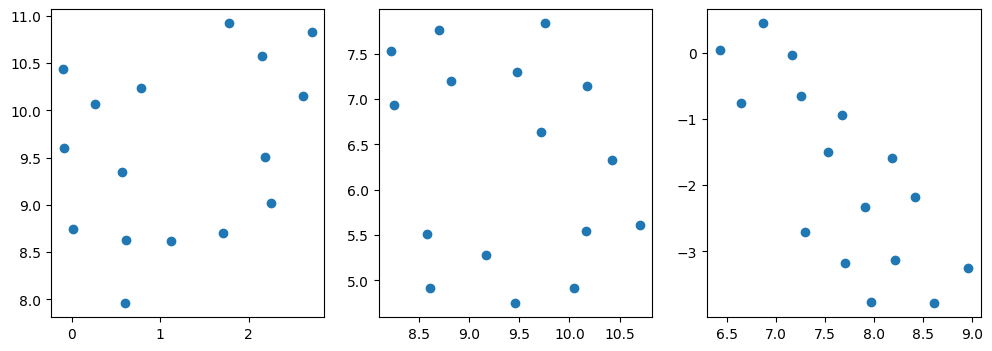

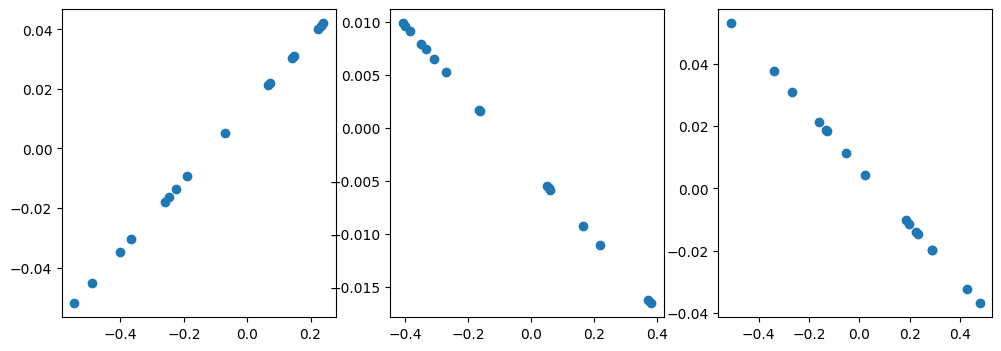

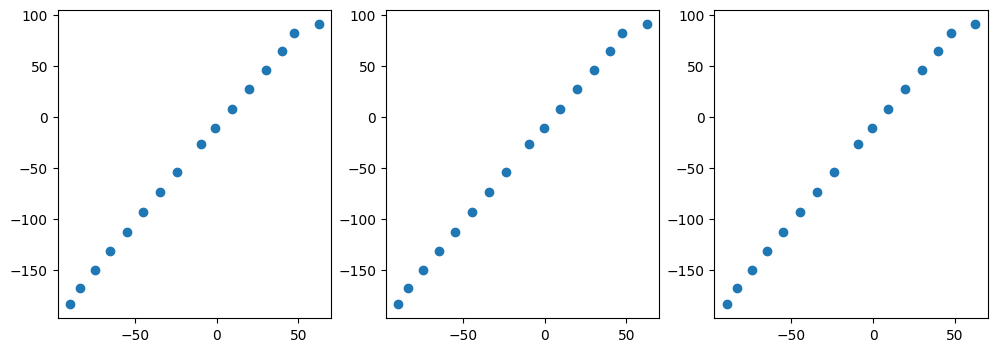

PCA + UMAP for 256


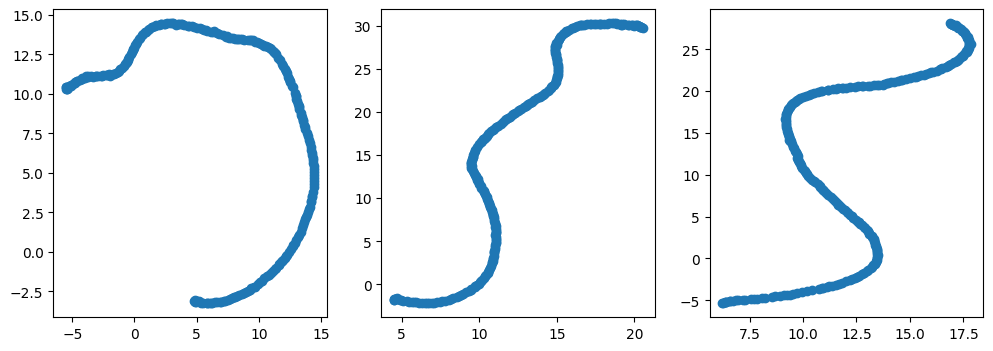

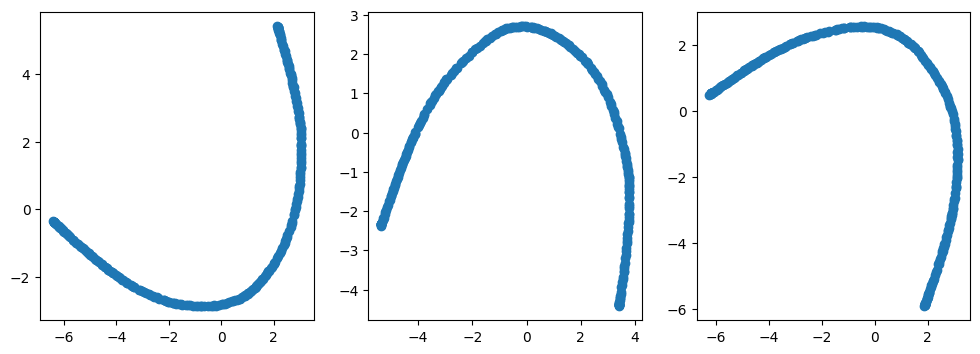

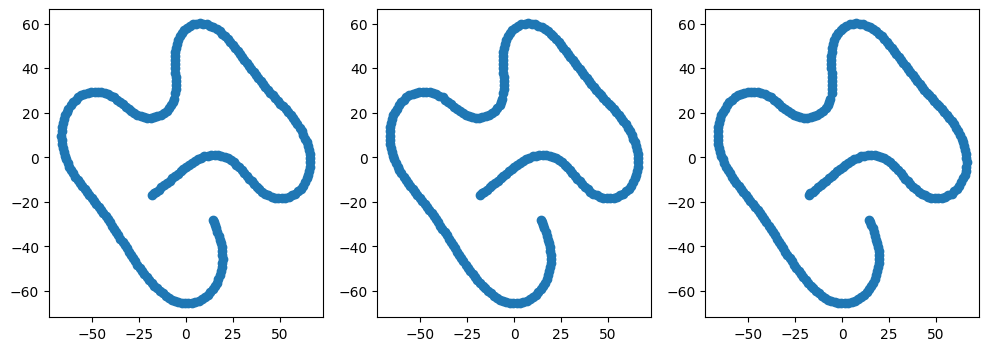

PCA + PaCMAP for 16


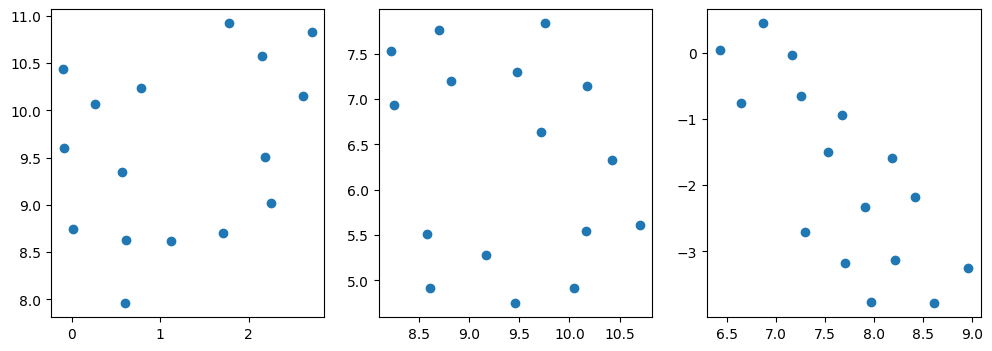

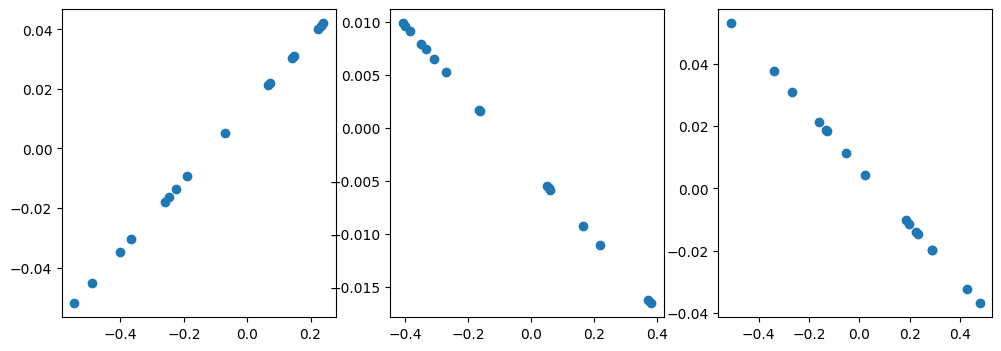

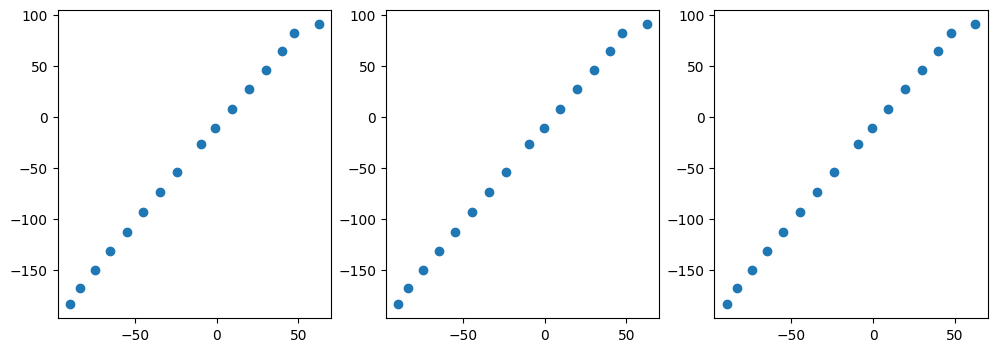

PCA + PaCMAP for 256


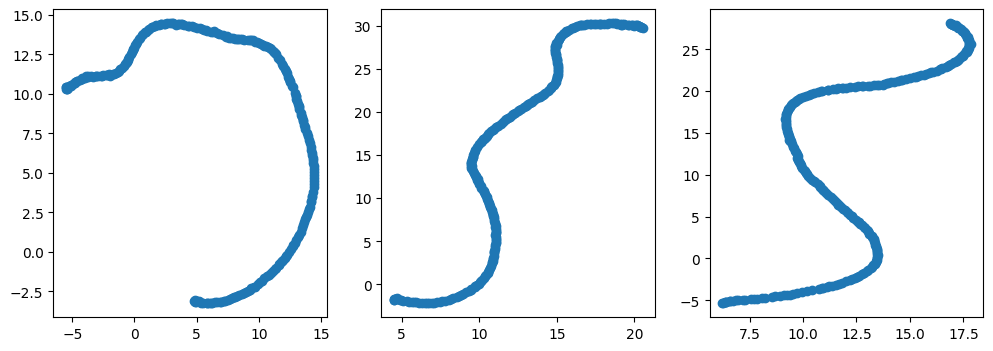

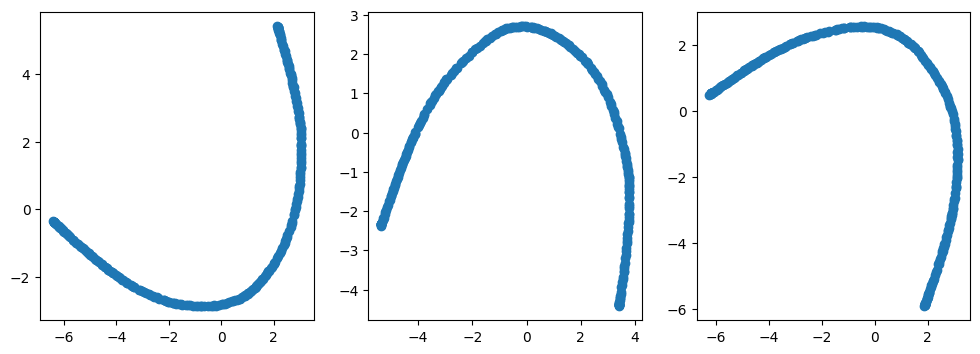

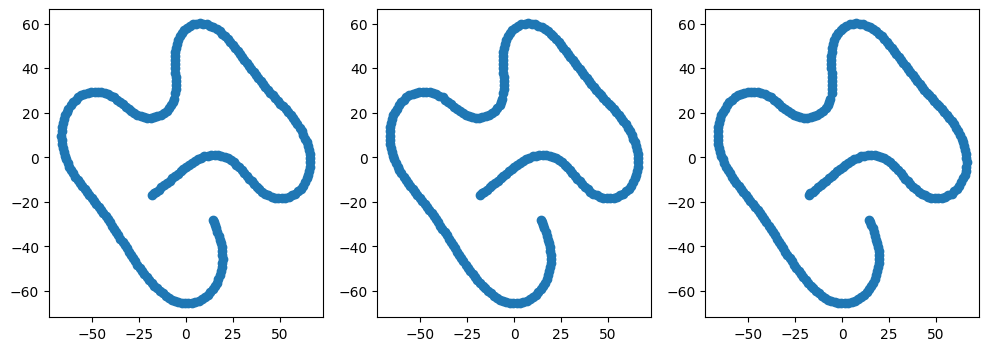

PCA + TSNE for 4


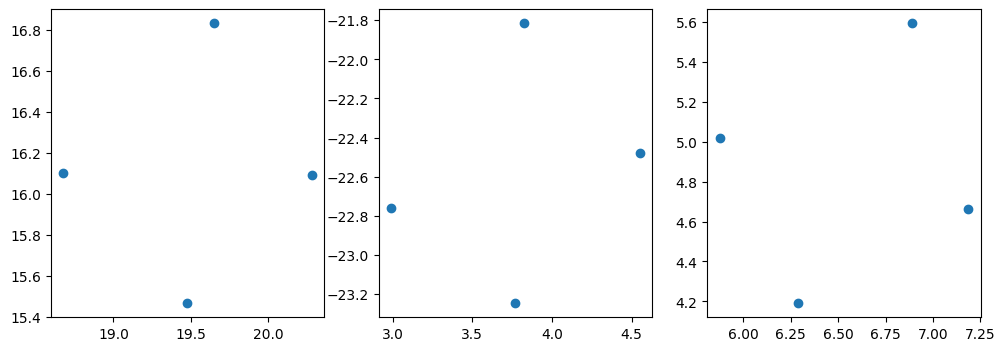

<Figure size 1200x400 with 0 Axes>

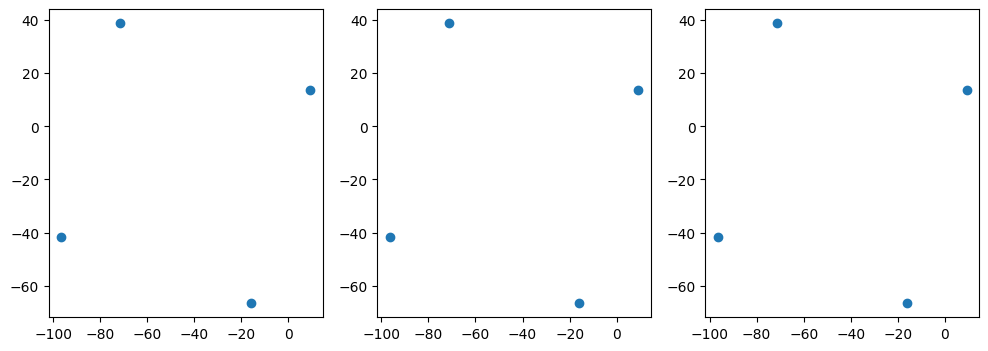

PCA + TSNE for 16


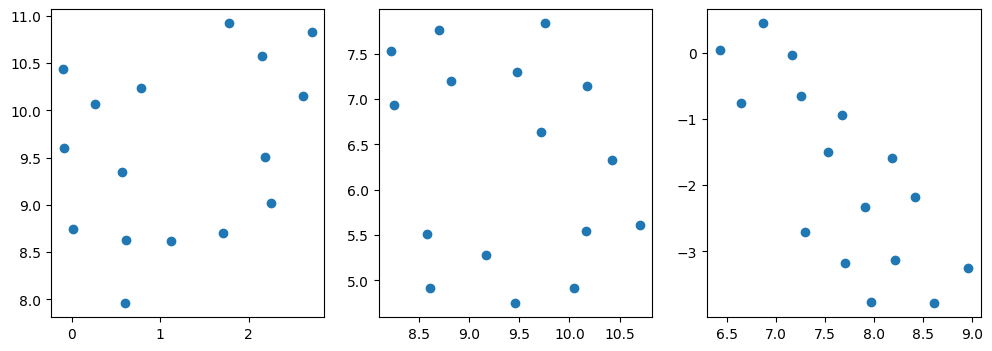

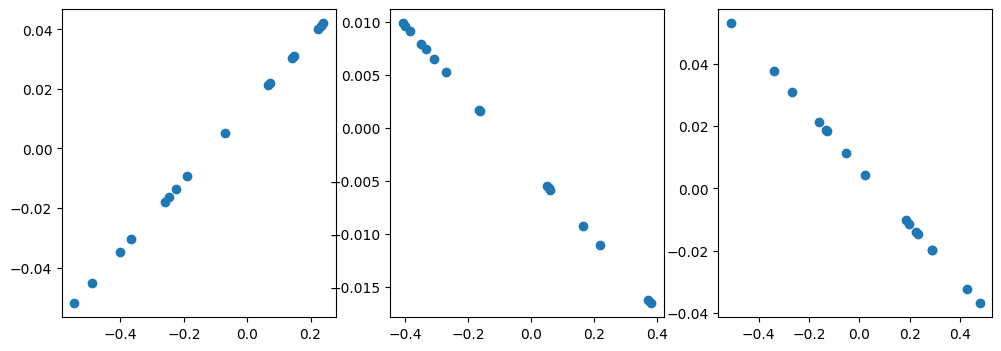

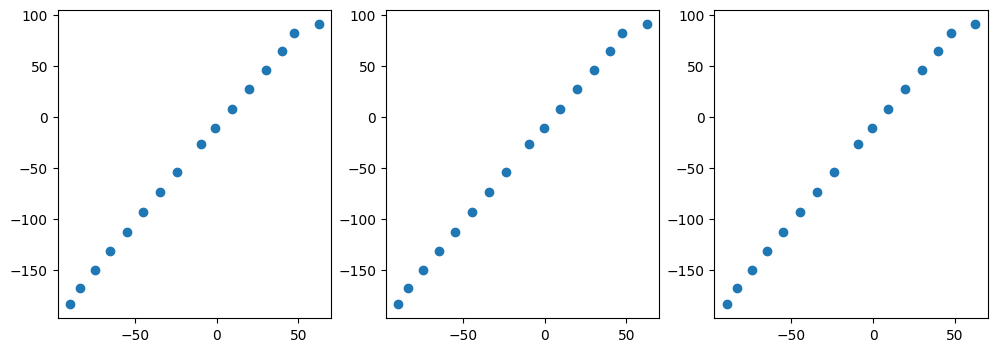

PCA + TSNE for 256


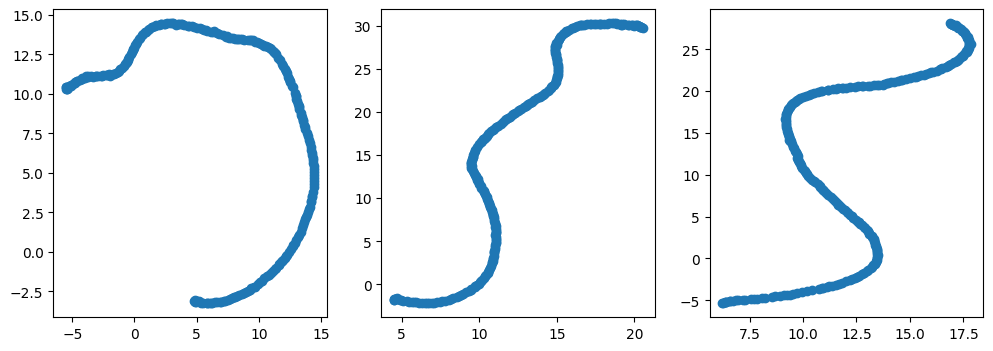

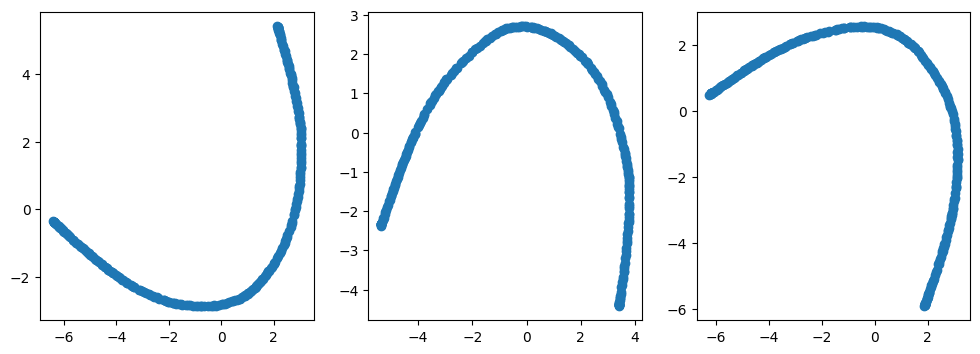

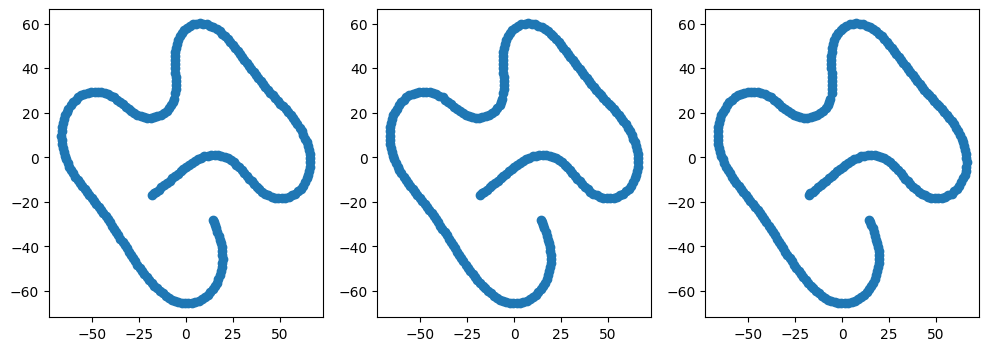

In [31]:
warnings.filterwarnings('ignore')
for method in methods:
  for size in sizes:
    if (size == 4 and method == 'PaCMAP'):
      continue
    print(f'PCA + {method} for {size}')
    show_methods(PCA().fit_transform(datasets[size]), random_states)
warnings.filterwarnings("default")

In [32]:
df_128 = generate_dataset(128)
df_32 = generate_dataset(32)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
d = 5
n_points = 5

df_256v_x = []
df_256v_y = []
state = 1
for i in range(128):
    for j in range(128):
        if df_128[j, i] == 1:
            class_label = 1
        else:
            class_label = 0
        x_cluster, y_cluster = make_blobs(n_samples=n_points, centers=[[i, j]], cluster_std=d, random_state=state)
        df_256v_x.extend(x_cluster)
        df_256v_y.extend([class_label] * n_points)
        state = state + 1

In [34]:
df_256v = pd.DataFrame(df_256v_x, columns=['x', 'y'])
df_256v['target'] = df_256v_y

print(f'Размерность датасета: {df_256v.shape}')
print(f'Количество признаков: {len(df_256v.drop("target", axis=1).columns)}')
print(f'Количество классов: {df_256v["target"].nunique()}')
print(f'Количество объектов в каждом из классов:\n{df_256v["target"].value_counts()}')
print(f'Объектов с неопределёнными признаками: {df_256v[df_256v.isnull().any(axis=1)].shape[0]/df_256v.shape[0]}%')

Размерность датасета: (81920, 3)
Количество признаков: 2
Количество классов: 2
Количество объектов в каждом из классов:
target
0    51040
1    30880
Name: count, dtype: int64
Объектов с неопределёнными признаками: 0.0%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
df_256v.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

x             y        target
count  81920.000000  81920.000000  81920.000000
mean      63.492623     63.489548      0.376953
std       37.302870     37.282711      0.484626
min      -16.581794    -17.705046      0.000000
25%       31.502060     31.524630      0.000000
50%       63.520533     63.478694      0.000000
75%       95.487644     95.479751      1.000000
max      145.377413    142.042418      1.000000

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


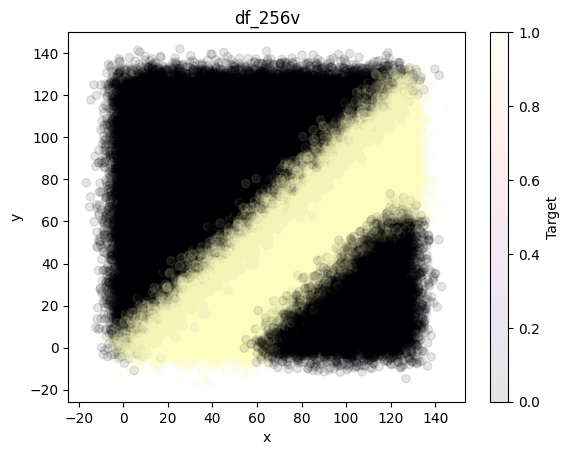

In [36]:
plt.scatter(df_256v['x'], df_256v['y'], c=df_256v['target'], cmap='magma', alpha=0.1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('df_256v')
plt.colorbar(label='Target')
plt.show()

In [37]:
pca = PCA(n_components=2)
df_256v_fit = pca.fit_transform(df_256v_x)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


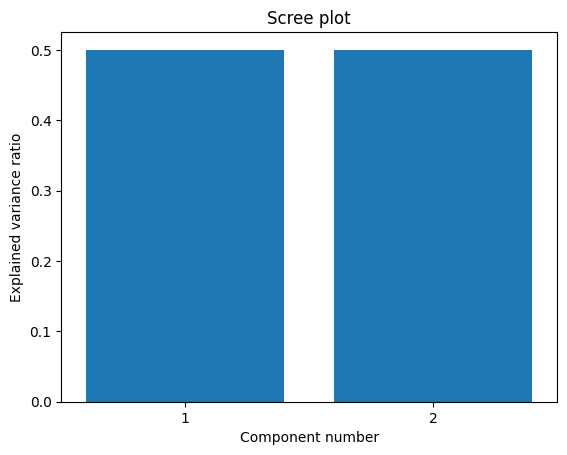

In [38]:
plt.bar([1, 2], pca.explained_variance_ratio_)
plt.title("Scree plot")
plt.xlabel("Component number")
plt.ylabel("Explained variance ratio")
plt.xticks([1, 2])
plt.xlim([0.5, 2.5])
plt.show()

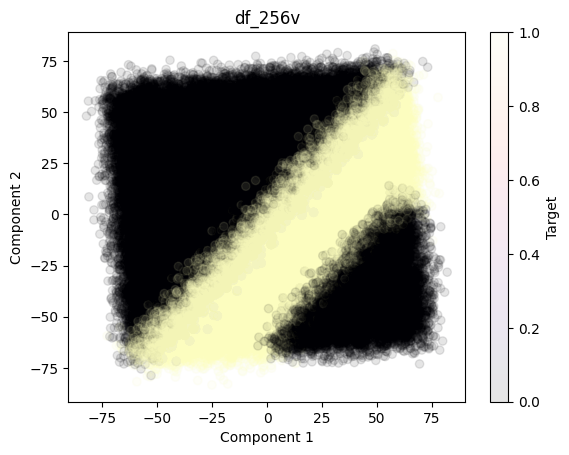

In [39]:
plt.scatter(df_256v_fit[:, 0], df_256v_fit[:, 1], c=df_256v_y, cmap='magma', alpha=0.1)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('df_256v')
plt.colorbar(label='Target')
plt.show()

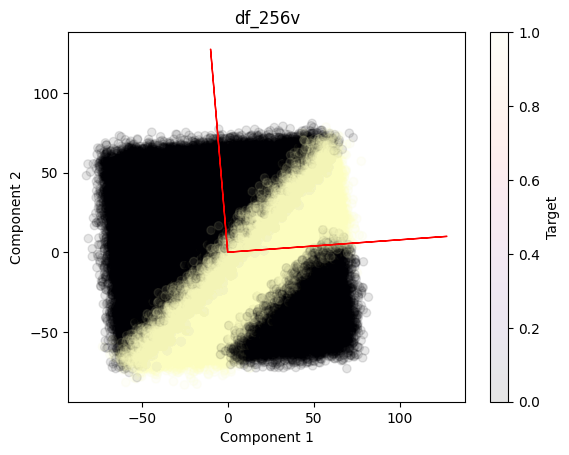

In [40]:
plt.scatter(df_256v_fit[:, 0], df_256v_fit[:, 1], c=df_256v_y, cmap='magma', alpha=0.1)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('df_256v')
plt.colorbar(label='Target')
for i in range(2):
        plt.arrow(0, 0, pca.components_[0, i] * 128, pca.components_[1, i] * 128, color='red')
plt.show()

In [45]:
def show_umap_with_classes(df, y, use_pca):
    reducer = umap.UMAP(n_components=2)
    if use_pca:
        embedding = reducer.fit_transform(df)
    else:
        embedding = reducer.fit_transform(PCA().fit_transform(df))
    plt.title(f'UMAP{" + PCA" if use_pca else ""}')
    plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='magma', alpha=0.1)
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


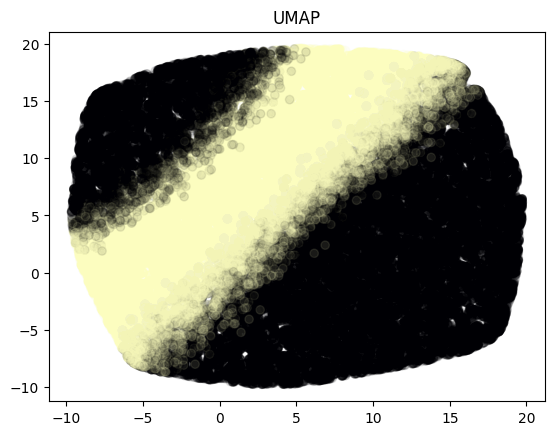

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


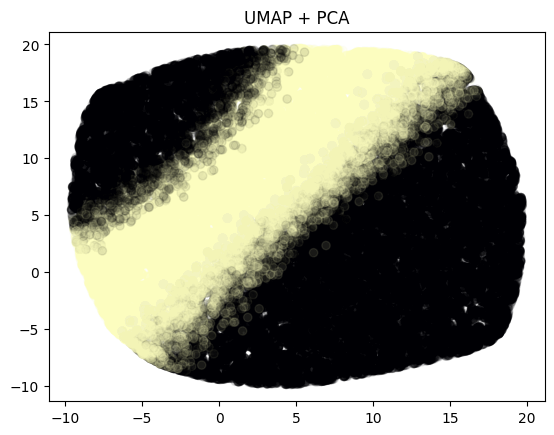

In [46]:
show_umap_with_classes(df_256v_x, df_256v_y, False)
show_umap_with_classes(df_256v_x, df_256v_y, True)

In [47]:
def show_pacmap_with_classes(df, y, use_pca):
    reducer = pacmap.PaCMAP(MN_ratio=1, FP_ratio= 0.1)
    if use_pca:
        embedding = reducer.fit_transform(df)
    else:
        embedding = reducer.fit_transform(PCA().fit_transform(df))
    plt.title(f'PacMAP{" + PCA" if use_pca else ""}')
    plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='magma', alpha=0.1)
    plt.show()

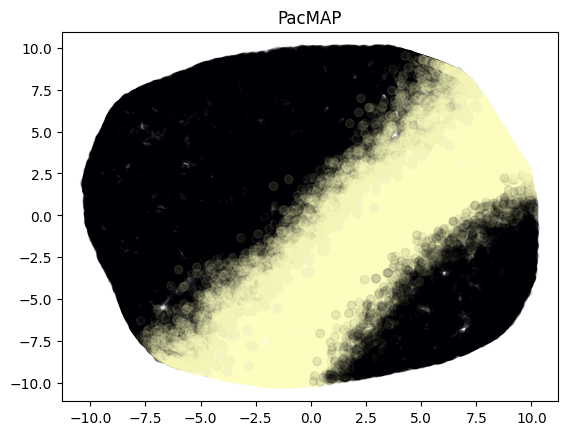

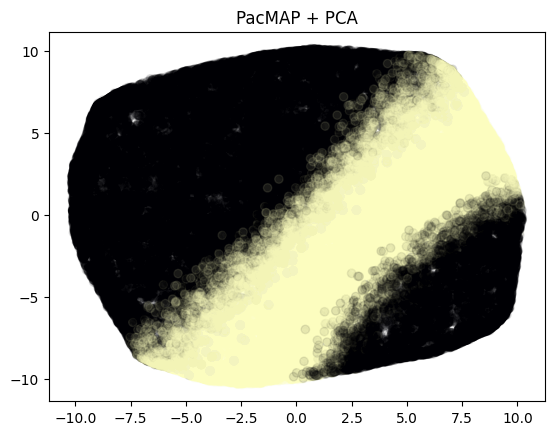

In [48]:
show_pacmap_with_classes(df_256v_x, df_256v_y, False)
show_pacmap_with_classes(df_256v_x, df_256v_y, True)

In [49]:
def show_tsne_with_classes(df, y, use_pca):
    reducer = TSNE(perplexity=3)
    if use_pca:
        embedding = reducer.fit_transform(np.array(df))
    else:
        embedding = reducer.fit_transform(PCA().fit_transform(df))
    plt.title(f'tSNE{" + PCA" if use_pca else ""}')
    plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='magma', alpha=0.1)
    plt.show()

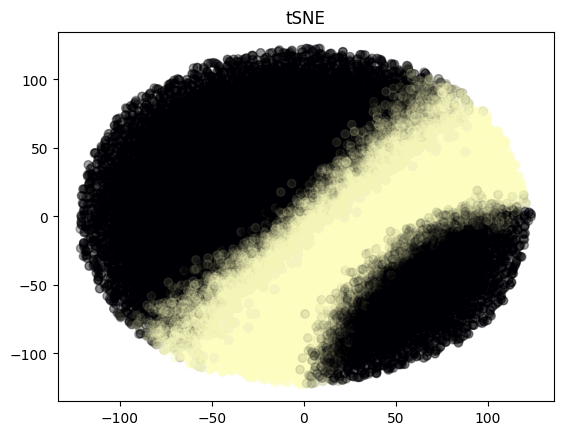

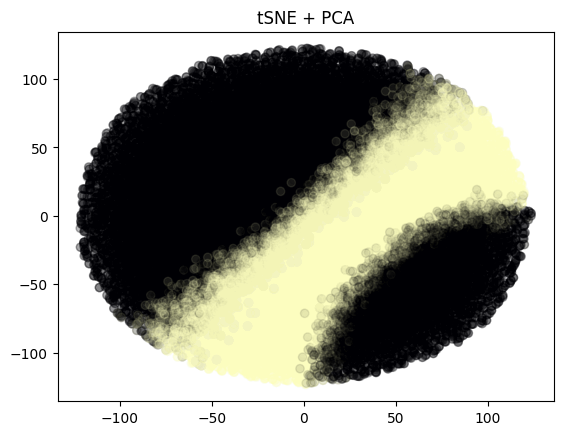

In [50]:
show_tsne_with_classes(df_256v_x, df_256v_y, False)
show_tsne_with_classes(df_256v_x, df_256v_y, True)

In [51]:
real_df = pd.read_csv('credit_scoring.csv', usecols=lambda x: x != 'ID').dropna()
real_df = real_df[(np.abs(stats.zscore(real_df)) < 5).all(axis=1)].reset_index(drop=True)
real_x = real_df.drop('Default', axis=1).to_numpy()
real_y = real_df['Default'].to_numpy()

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [52]:
print(f'Размерность датасета: {real_df.shape}')
print(f'Количество признаков: {len(real_df.drop("Default", axis=1).columns)}')
print(f'Количество классов: {real_df["Default"].nunique()}')
print(f'Количество объектов в каждом из классов:\n{real_df["Default"].value_counts()}')
print(f'Объектов с неопределёнными признаками: {real_df[real_df.isnull().any(axis=1)].shape[0]/real_df.shape[0]}%')

Размерность датасета: (118826, 11)
Количество признаков: 10
Количество классов: 2
Количество объектов в каждом из классов:
Default
0    110695
1      8131
Name: count, dtype: int64
Объектов с неопределёнными признаками: 0.0%


In [53]:
real_df.describe()

Default    Prct_uso_tc           Edad  Nro_prestao_retrasados  \
count  118826.000000  118826.000000  118826.000000           118826.000000   
mean        0.068428       0.597286      51.305447                0.260145   
std         0.252480      14.845645      14.446933                0.714965   
min         0.000000       0.000000       0.000000                0.000000   
25%         0.000000       0.034839      40.000000                0.000000   
50%         0.000000       0.176063      51.000000                0.000000   
75%         0.000000       0.576016      62.000000                0.000000   
max         1.000000    1194.000000     103.000000               13.000000   

       Prct_deuda_vs_ingresos  Mto_ingreso_mensual  \
count           118826.000000        118826.000000   
mean                10.108146          6443.525752   
std                111.419096          5046.742207   
min                  0.000000             0.000000   
25%                  0.143123          3410.000000   
50%                  0.294570          5400.000000   
75%                  0.478054          8200.000000   
max               2146.500000         78500.000000   

       Nro_prod_financieros_deuda  Nro_retraso_60dias  \
count               118826.000000       118826.000000   
mean                     8.694949            0.091731   
std                      5.012157            0.487989   
min                      0.000000            0.000000   
25%                      5.000000            0.000000   
50%                      8.000000            0.000000   
75%                     11.000000            0.000000   
max                     34.000000           17.000000   

       Nro_creditos_hipotecarios  Nro_retraso_ultm3anios  Nro_dependiente  
count              118826.000000           118826.000000    118826.000000  
mean                    1.024212                0.067342         0.845185  
std                     1.017281                0.335552         1.131877  
min                     0.000000                0.000000         0.000000  
25%                     0.000000                0.000000         0.000000  
50%                     1.000000                0.000000         0.000000  
75%                     2.000000                0.000000         2.000000  
max                     6.000000               11.000000         6.000000

In [63]:
feature_pairs = list(combinations(range(len(real_x[0])), 2))

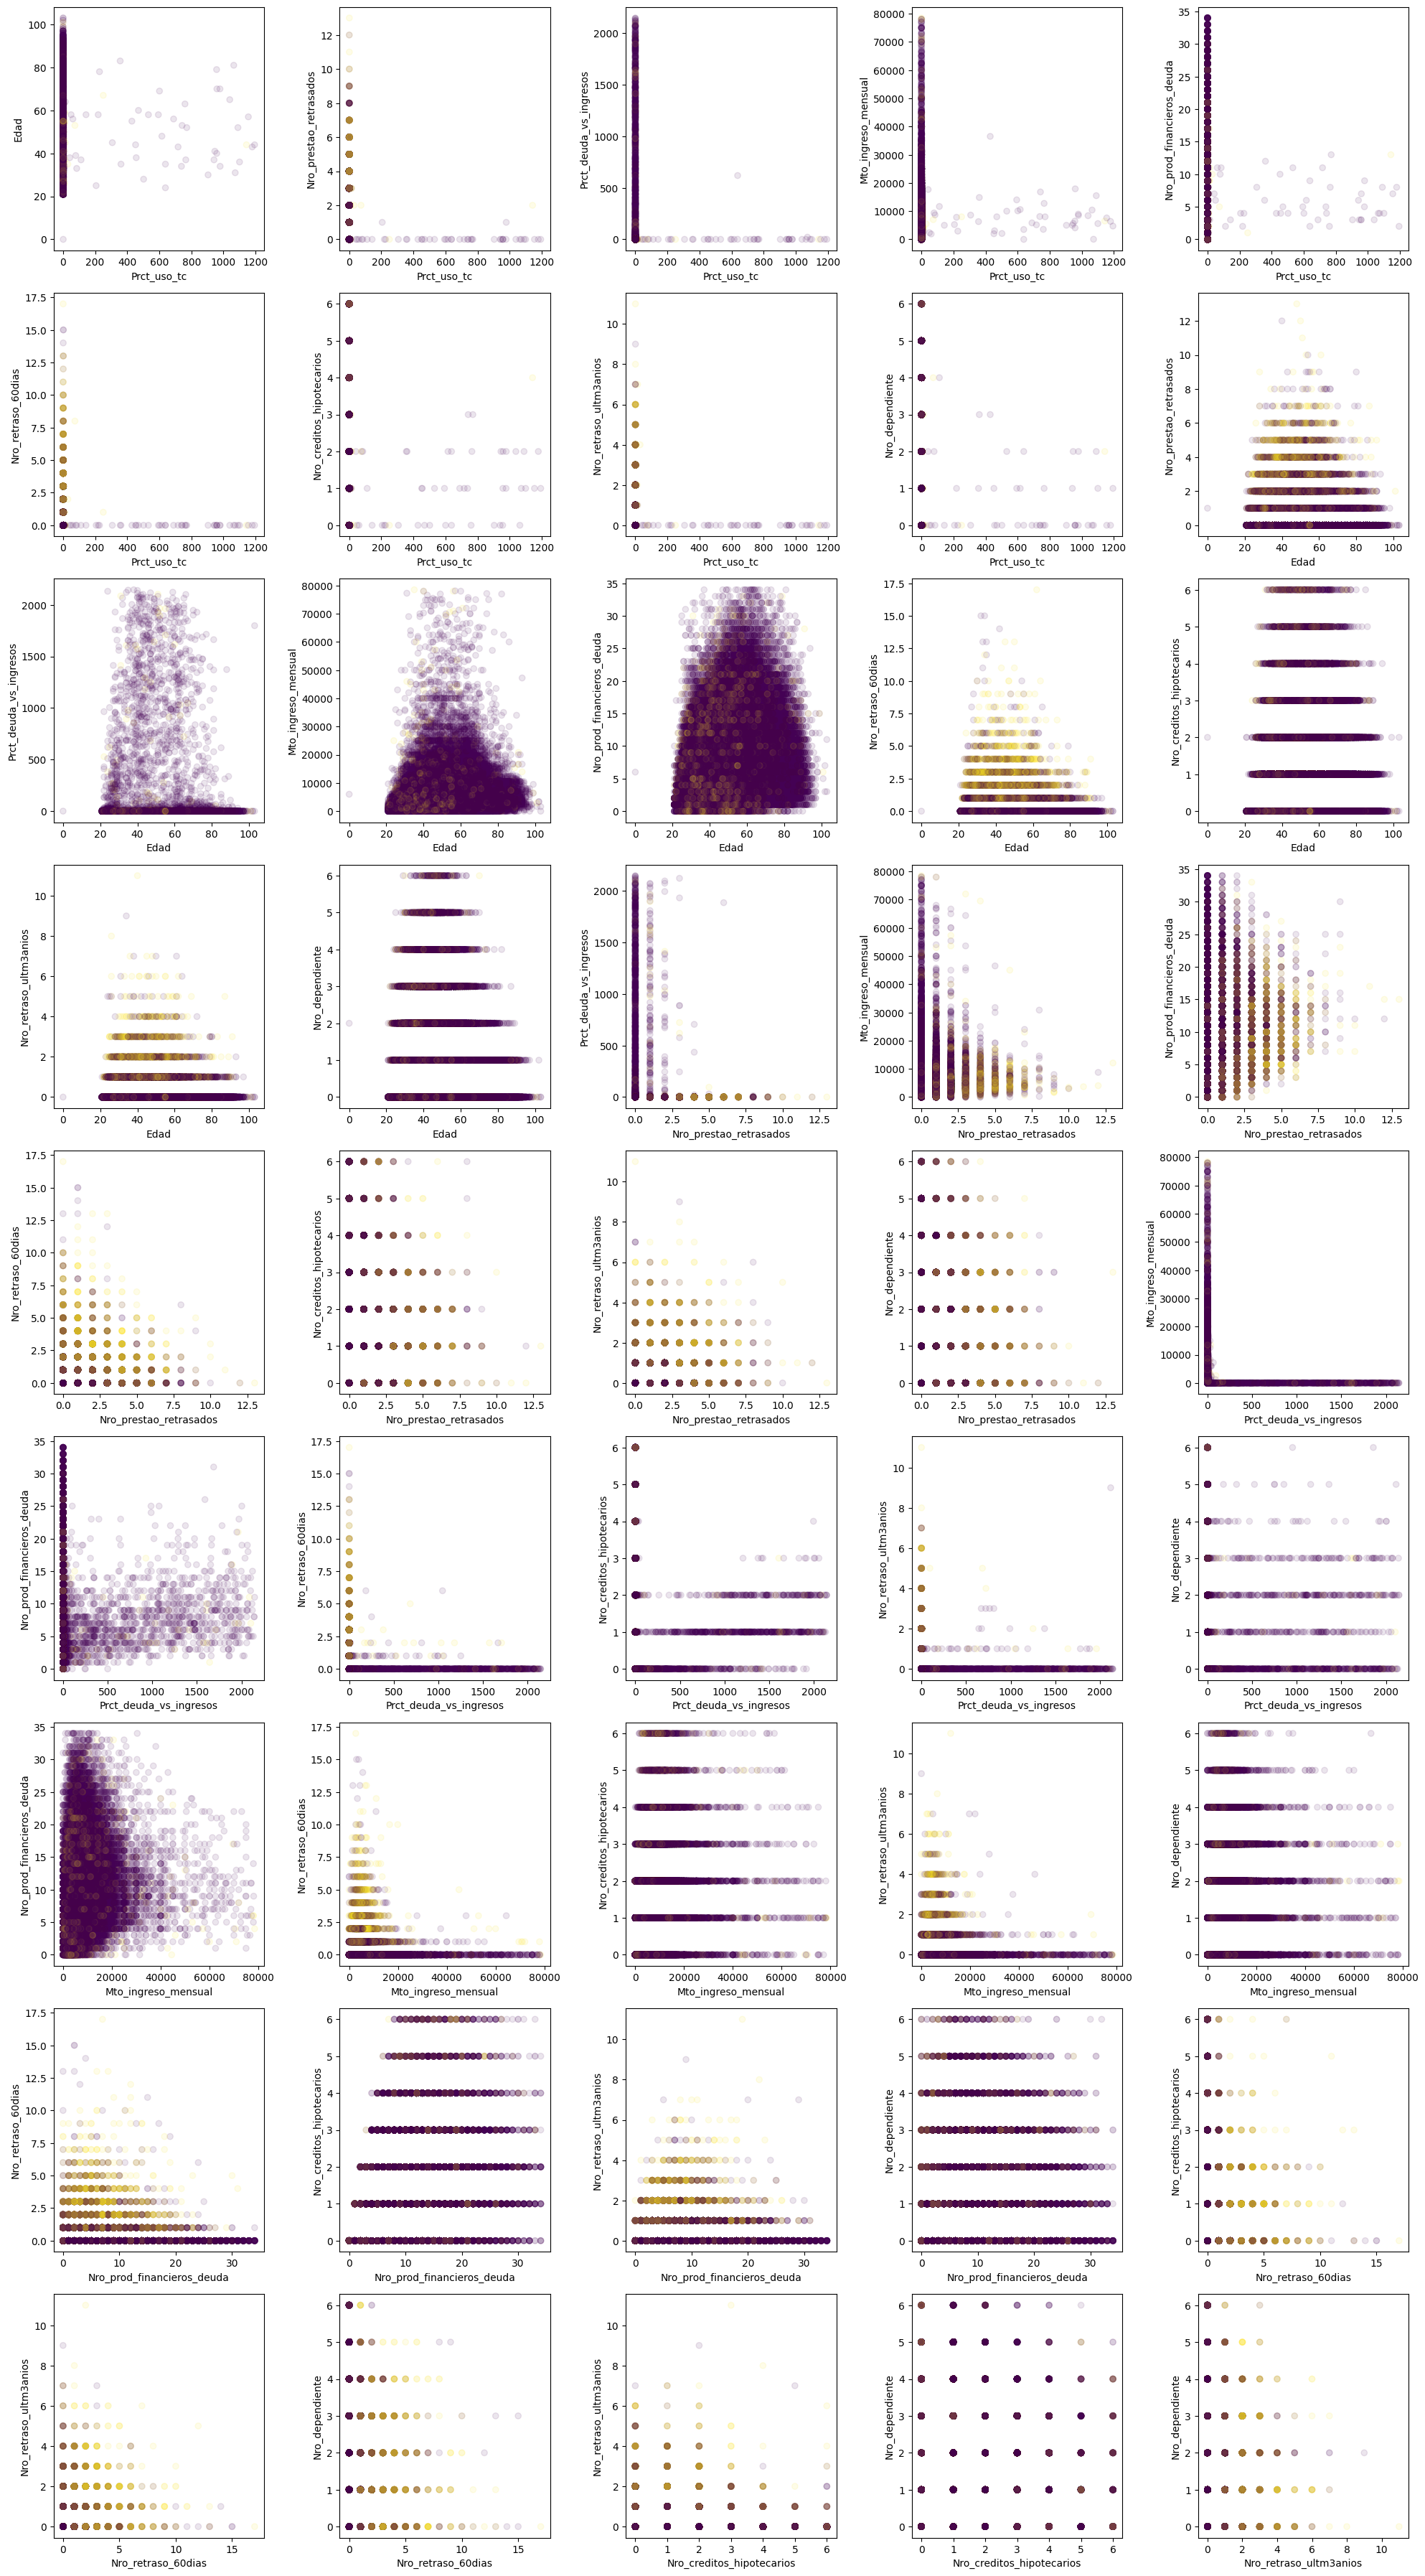

In [64]:
columns = real_df.drop('Default', axis=1).columns
plt.figure(figsize=(5*4, 9*4))
for i in range(len(feature_pairs)):
    plt.subplot(9, 5, i + 1)
    plt.scatter(real_x[:, feature_pairs[i][0]], real_x[:, feature_pairs[i][1]], c=real_y, alpha=0.1)
    plt.xlabel(columns[feature_pairs[i][0]])
    plt.ylabel(columns[feature_pairs[i][1]])
plt.tight_layout()
plt.show()

In [115]:
def scree_plot_with_coloring(df):

    pca = PCA()
    pca.fit(df)

    explained_variance_ratios = pca.explained_variance_ratio_
    n_components = len(explained_variance_ratios)

    broken_stick_values = [
        sum(1 / i for i in range(k, n_components + 1)) / n_components
        for k in range(1, n_components + 1)
    ]

    bar_colors = [
        'red' if evr > bsv else 'blue'
        for evr, bsv in zip(explained_variance_ratios, broken_stick_values)
    ]

    viable_components_number = bar_colors.count('blue')

    plt.bar(range(1, n_components + 1), explained_variance_ratios, color=bar_colors)
    for i in range(viable_components_number + 1):
      plt.axhline(y=broken_stick_values[i], color='black', linestyle='--', label=f'Broken stick threshold ({i})')
    plt.title("Scree plot with Broken Stick Method")
    plt.xlabel("Component number")
    plt.ylabel("Explained Variance Ratio")
    plt.legend()
    plt.show()

    return viable_components_number

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


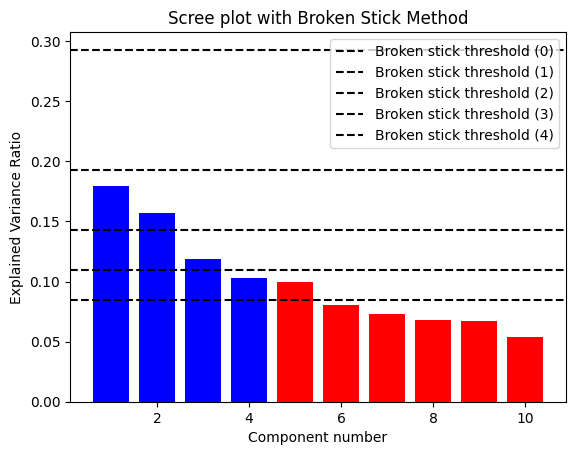

In [118]:
real_x_normalized = StandardScaler().fit_transform(real_x)
broken_stick_result = scree_plot_with_coloring(real_x_normalized)

In [121]:
def show_pca_with_classes(df, y):
    pca = PCA()
    df_fit = pca.fit_transform(df)
    plt.figure(figsize=(12, 12))
    c = 0
    num_components = 4
    subplot_idx = 1

    for i in range(c + 1, c + num_components):
        plt.subplot(num_components - 1, num_components - 1, subplot_idx)
        plt.scatter(df_fit[:, c], df_fit[:, i], c=y, alpha=0.1)
        plt.xlabel(f'component {c + 1}')
        plt.ylabel(f'component {i + 1}')

        subplot_idx += 1

        for j in range(10):
            plt.arrow(0, 0, pca.components_[c, j], pca.components_[i, j], color='white', alpha=0.5)
    plt.tight_layout()
    plt.show()

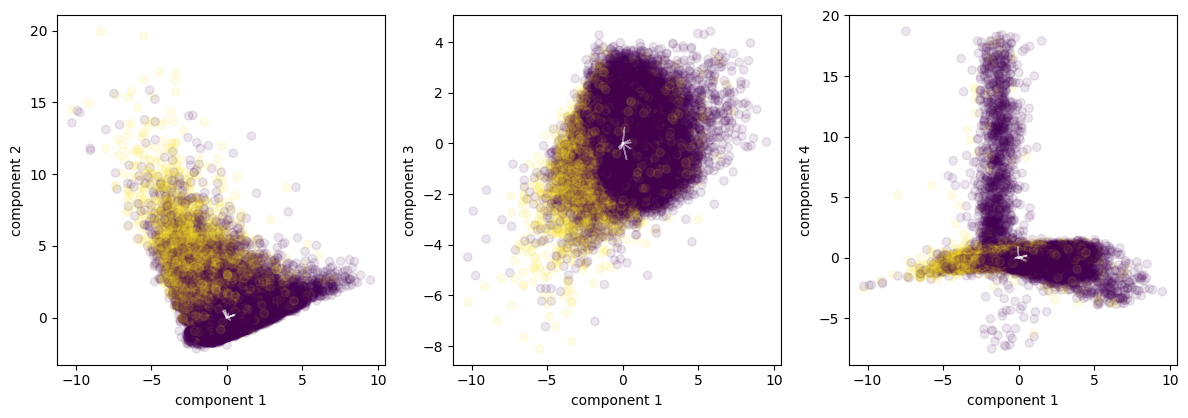

In [122]:
show_pca_with_classes(real_x_normalized, real_y)

In [123]:
print(f"Kaiser's method: {sum(pca.explained_variance_ > 1)}")
print(f'Broken stick: {broken_stick_result}')

Kaiser's method: 2
Broken stick: 4


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


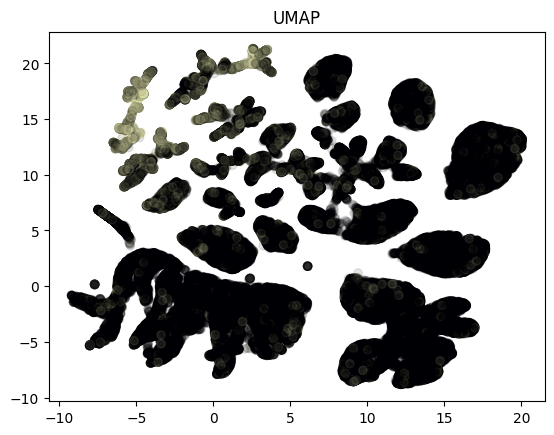

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


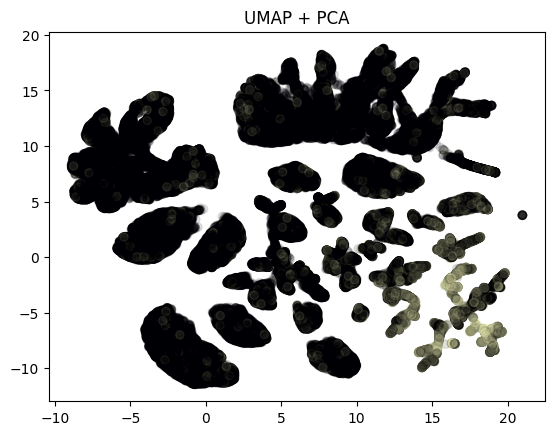

In [124]:
show_umap_with_classes(real_x_normalized, real_y, False)
show_umap_with_classes(real_x_normalized, real_y, True)

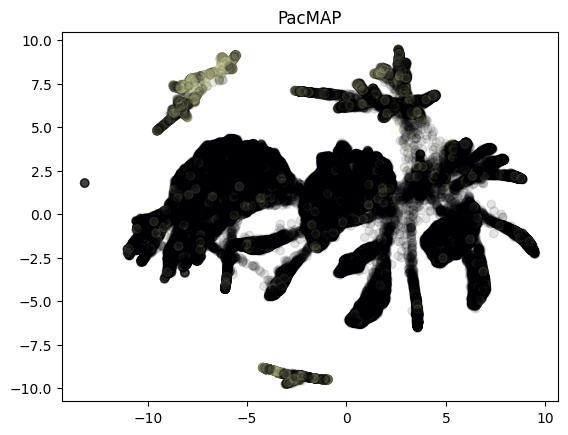

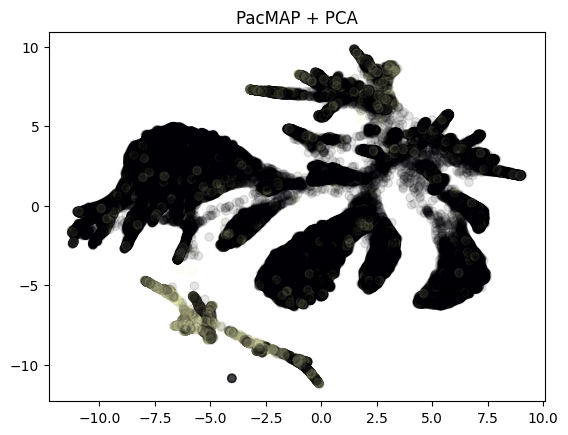

In [125]:
show_pacmap_with_classes(real_x_normalized, real_y, False)
show_pacmap_with_classes(real_x_normalized, real_y, True)

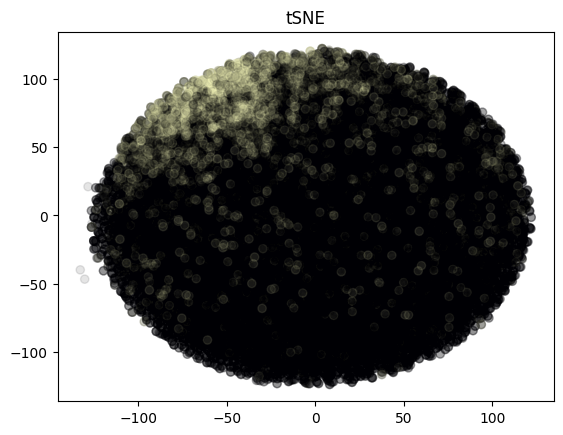

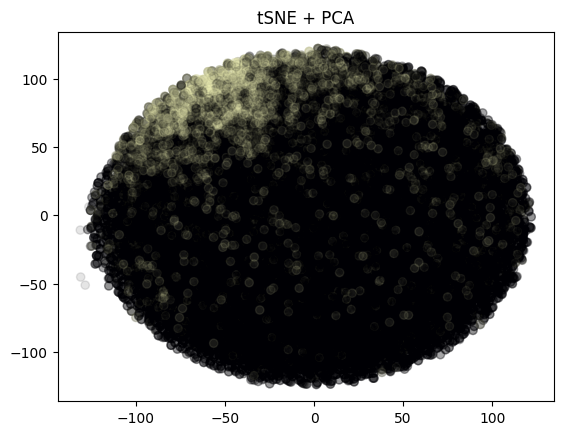

In [126]:
show_tsne_with_classes(real_x_normalized, real_y, False)
show_tsne_with_classes(real_x_normalized, real_y, True)